In [1]:
#import the modules necessary for Data Manipulation and Visualization.
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical computation
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced statistical visualizations
sns.set(color_codes=True)  # Set seaborn color palette to default

import warnings
warnings.filterwarnings('ignore')# Filtering out the warnings.

### READING THE DATASET

In [3]:
#reading the dataset "application_data.csv"
df_app=pd.read_csv("application_data.csv")

In [4]:
#reading the top 5 rows of dataset using .head()
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [5]:
#chechking data types and of ckoumns and rows
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
#checking the no. of rows and columns
df_app.shape

(307511, 122)

In [7]:
#checking the null values
df_app.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
#converting null values to percentage to check whether to drop or keep it dataframe
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_app.columns[(round(100*(df_app.isnull().sum()/len(df_app.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [9]:
df_app = df_app.drop(cols_30_percent_missing_values,axis=1)

In [10]:
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       

In [11]:
cols_to_del = ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE',
                   'FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']
cols_to_del

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [12]:
df_app = df_app.drop(cols_to_del,axis=1)

In [13]:
#checking the shape after dropping the unecessary columns
df_app.shape #checking

(307511, 53)

In [14]:
#columns reamining after removal
df_app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
       'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCU

## HANDLING MISSING VALUES

In [16]:
df_app.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_ID_PUBLISH                    0
CNT_FAM_MEMBERS                    2
REGION_RATING_CLIENT               0
REGION_RATING_CLIENT_W_CITY        0
REG_REGION_NOT_LIVE_REGION         0
REG_REGION_NOT_WORK_REGION         0
ORGANIZATION_TYPE                  0
EXT_SOURCE_2                     660
EXT_SOURCE_3                   60965
F

In [17]:
# Percent of missing values in columns
(round(100*(df_app.isnull().sum()/len(df_app.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.21
EXT_SOURCE_3                   19.83
F

## lets analyze each column one by one with some values missing

### Column: EXT_SOURCE_3 and EXT_SOURCE_2

In [20]:
# Count the rows for which EXT_SOURCE_2 and EXT_SOURCE_3 both are empty
len(df_app[np.isnan(df_app['EXT_SOURCE_2']) & np.isnan(df_app['EXT_SOURCE_3'])])

230

In [21]:
# As there are only 230 such records we can delete those.
# Note:- As we have total 307511 records deleting only 230 records will not affect our further analysis
df_app = df_app[(~(np.isnan(df_app['EXT_SOURCE_2']) & np.isnan(df_app['EXT_SOURCE_3'])))]

In [22]:
# Comparing EXT_SOURCE_2 and EXT_SOURCE_3 column 
round(df_app.loc[:, ['EXT_SOURCE_2', 'EXT_SOURCE_3']].describe(),3)

EXT_SOURCE_2  EXT_SOURCE_3
count    306851.000    246546.000
mean          0.514         0.511
std           0.191         0.195
min           0.000         0.001
25%           0.392         0.371
50%           0.566         0.535
75%           0.664         0.669
max           0.855         0.896

##### We can see that the difference between mean and median is quite narrow for both the columns. Also, the variation from 25th to 75th percentile is equally distributed. 
##### Thus, let's impute the missing values by the mean value of `EXT_SOURCE_2` and `EXT_SOURCE_3` respectively.

In [24]:
# Imputing EXT_SOURCE_2 and EXT_SOURCE_3 by mean values
df_app.loc[np.isnan(df_app['EXT_SOURCE_2']), ['EXT_SOURCE_2']] = df_app['EXT_SOURCE_2'].mean()
df_app.loc[np.isnan(df_app['EXT_SOURCE_3']), ['EXT_SOURCE_3']] = df_app['EXT_SOURCE_3'].mean()


In [25]:
(round(100*(df_app.isnull().sum()/len(df_app.index)),2))

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_ID_PUBLISH                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
REG_REGION_NOT_LIVE_REGION      0.00
REG_REGION_NOT_WORK_REGION      0.00
ORGANIZATION_TYPE               0.00
EXT_SOURCE_2                    0.00
EXT_SOURCE_3                    0.00
F

######  missing values in EXT_SOURCE_2 and EXT_SOURCE_3  have been imputed

### Column:AMT_GOODS_PRICE

In [28]:
df_app['AMT_GOODS_PRICE'].describe().apply(lambda x: '%.2f' % x)

count     307004.00
mean      538484.20
std       369486.08
min        40500.00
25%       238500.00
50%       450000.00
75%       679500.00
max      4050000.00
Name: AMT_GOODS_PRICE, dtype: object

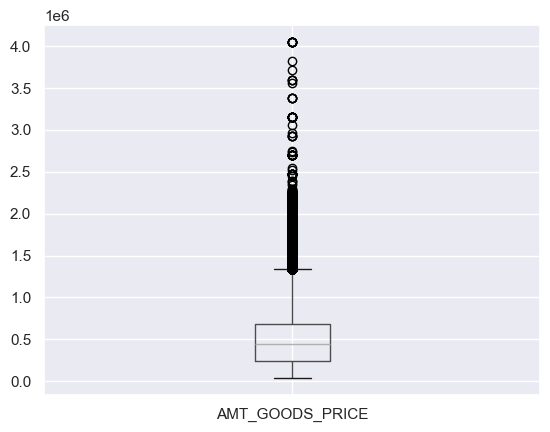

In [29]:
df_app.boxplot(column =['AMT_GOODS_PRICE']) 
plt.show()

We see the standard deviation of `AMT_GOODS_PRICE` is very high. Also there are good amount of outliers in the colum as well.
So, imputing missing values with mean or median will be biased in this case.
Hence, it is better to remove the rows with missing `AMT_GOODS_PRICE`. Infact these rows are only 0.09% of the whole records.

In [31]:
#filtering the valuse
df_app = df_app[~np.isnan(df_app['AMT_GOODS_PRICE'])]

We have 5 columns for the number of enquiries to Credit Bureau about the client.
It doesn't make much sense to count the number for a very short period of time such as an hour or a day or a week before the application date. On the other had it also make lesser sense if we count the number for a very long period of time. 
Hence, it will be feasible for us if we take the count for a quater, which is not too short or too long time period.
So, we have to do two things now:-
1. We will handle missing data for the column `AMT_REQ_CREDIT_BUREAU_QRT`
2. We will delete the column for the count of hour, day, week, month and year.

In [33]:
# Handling AMT_REQ_CREDIT_BUREAU_QRT 
df_app['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265662.000000
mean          0.265552
std           0.794315
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

This is an integer type variable, and thus have values 0, 1, 2 etc. We cannot impute the NaNs by the mean or the median (1.53 enquires does not make sense!).
Thus, we need to impute them by the mode - the most common occurring value if that approach is feasible.

In [35]:
# Imputing AMT_REQ_CREDIT_BUREAU_QRT with 0
df_app.loc[pd.isnull(df_app['AMT_REQ_CREDIT_BUREAU_QRT']), ['AMT_REQ_CREDIT_BUREAU_QRT']] = 0

In [36]:
# Deleting AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_YEAR
df_app = df_app.drop(['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR'],axis=1)

In [37]:
(round(100*(df_app.isnull().sum()/len(df_app.index)),2))

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
CNT_FAM_MEMBERS                0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_REGION_NOT_LIVE_REGION     0.0
REG_REGION_NOT_WORK_REGION     0.0
ORGANIZATION_TYPE              0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_2                0.0
FLAG_DOCUMENT_3     

#### We now have a dataframe with no missing values. Let's finally look at how many rows we have lost in the process.
#### At the begining we had `307511` rows.

In [39]:
df_app.shape

(307004, 48)

In [40]:
# Percentage of rows lost
(100 - 100*(len(df_app.index)/307511))

0.16487215091493113

#### We just have lost 0.16% rows in the entire data cleaning process

#### Converting `DAYS_BIRTH` column into `AGE` column for readablity and analysis

In [43]:
# Divide 'DAYS_BIRTH' by 365 for taking Age
df_app['AGE'] = abs(df_app['DAYS_BIRTH']//365)


In [44]:
# Drop 'DAYS_BIRTH' column
df_app = df_app.drop(['DAYS_BIRTH'],axis=1)

#### Converting `DAYS_EMPLOYED` column into `YEARS_EMPLOYED` column for readablity and analysis

In [46]:
# Divide 'DAYS_EMPLOYED' by 365 for YEAR_EMPLOYED
df_app['YEARS_EMPLOYED'] = abs(df_app['DAYS_EMPLOYED']//365)

In [47]:
df_app=df_app.drop(['DAYS_EMPLOYED'],axis=1)

In [48]:
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_15 FLAG_DOCUMENT_16 FLAG_DOCUMENT_17 FLAG_DOCUMENT_18  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0                0                 0                 0   
1                0                 0                 0   
2                0                 0                 0   
3                0                 0                 0   
4                0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  
0                        0.0   26               2  
1                        0.0   46               4  
2                        0.0   53               1  
3                        0.0   53               9  
4                        0.0   55               9  

[5 rows x 48 columns]

### Identifying and Removing outliers

In [50]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE']
for col in col_list_outlier: 
    q1 = df_app[col].quantile(0.25)
    q3 = df_app[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_app = df_app.loc[(df_app[col] > range_low) & (df_app[col] < range_high)]

df_app.shape

(275984, 48)

In [51]:
# Percentage of rows lost
round((100 - 100*(len(df_app.index)/307511)),2)

10.25

##### Though we lost around `10%` rows in the outliers handling exercise, we got rid of the outliers for fair analysis of the data.  

## checking data imbalance

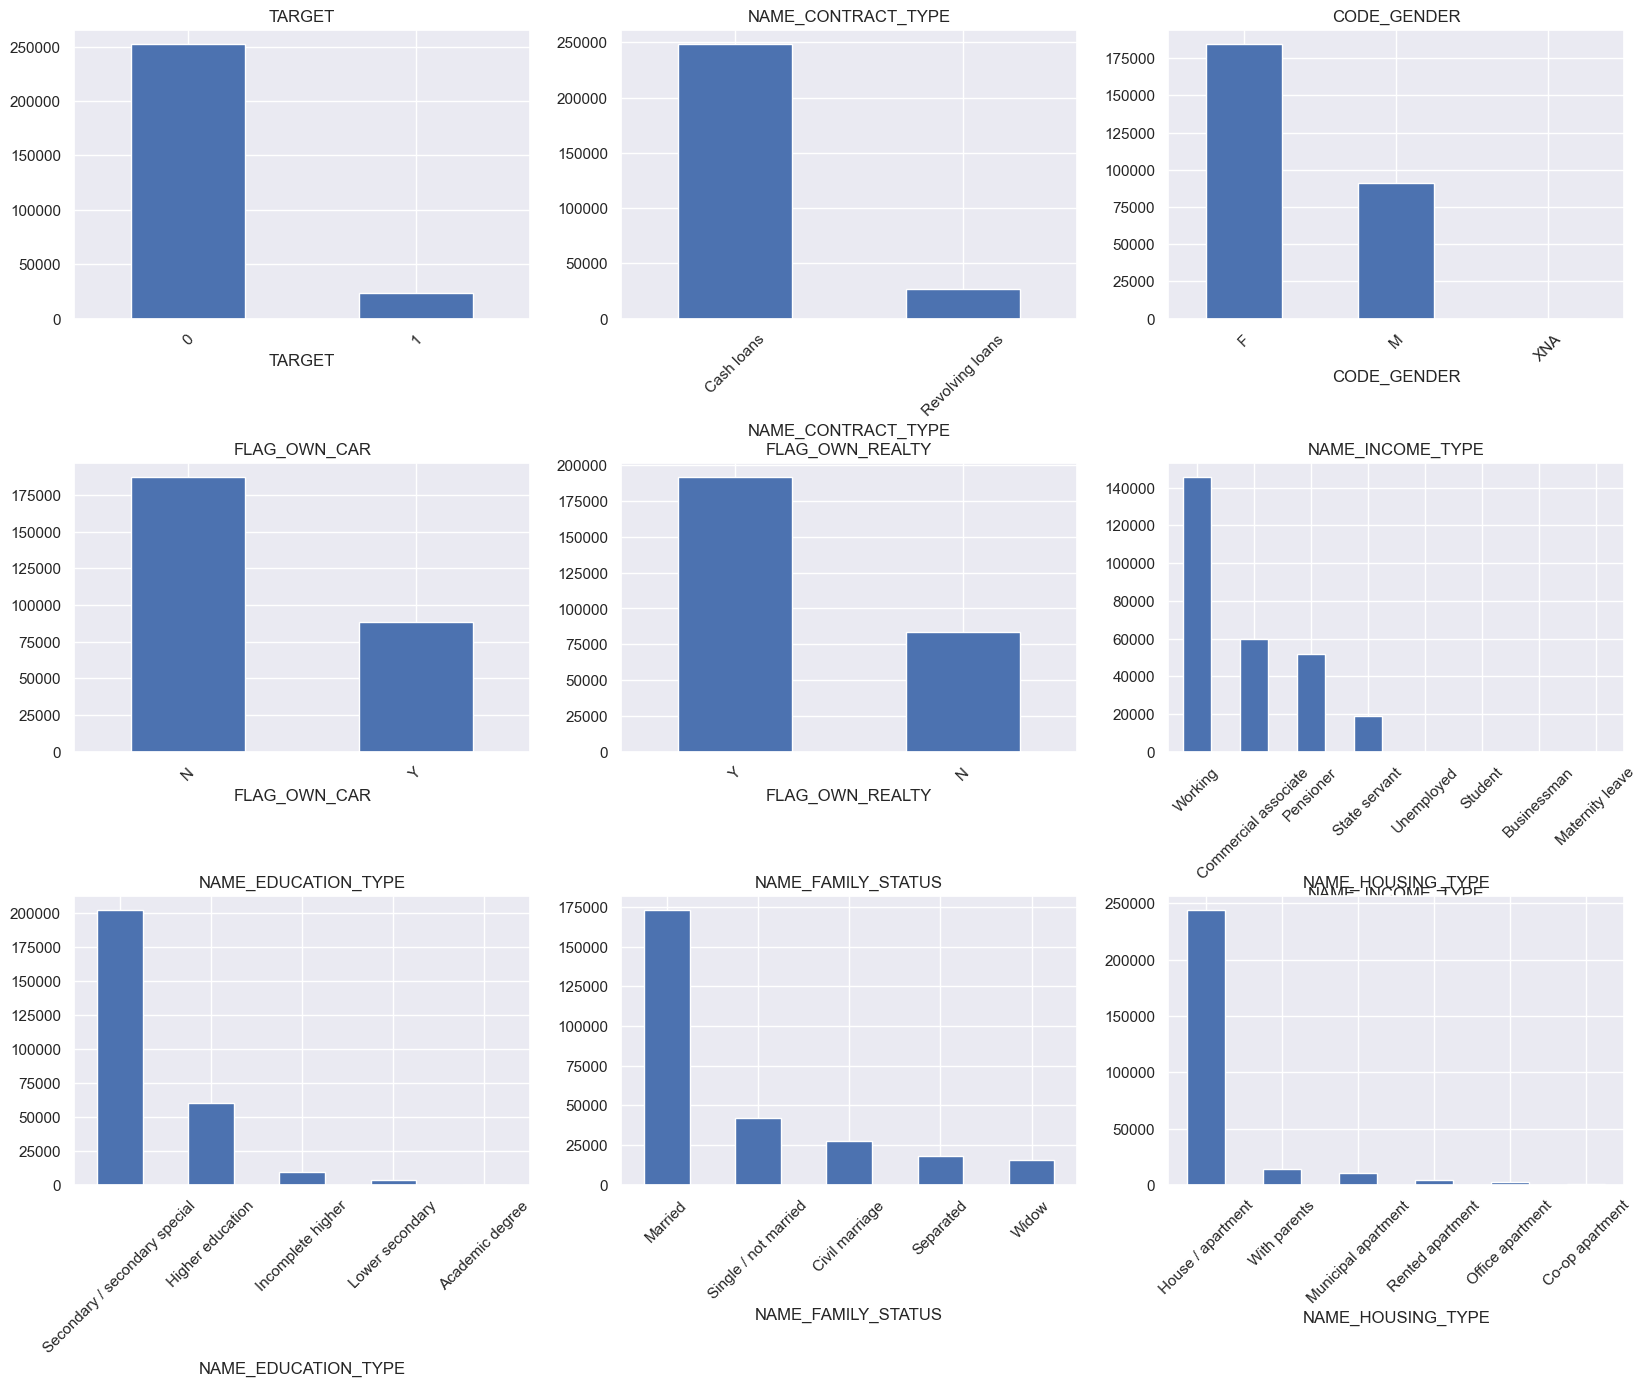

In [54]:
# Listing columns for checking data imbalance and plotting them
col_list = ['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
            'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
k=0
plt.figure(figsize=(20,15))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    df_app[col].value_counts().plot(kind='bar');
    plt.title(col)
    plt.subplots_adjust(hspace=0.5)
    plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.show()

We can see that there is data imbalance in below columns:-
1. TARGET -  There are very few defaulters(1) compare to non defaulters(0)
2. NAME_CONTRACT_TYPE - There are very few Revolving loans than Cash loans
3. NAME_EDUCATION_TYPE - Most of the loans applied by Secondary/Secondary special educated people
4. NAME_FAMILY_STATUS - Most of the loans applied by Married people.
5. NAME_HOUSING_TYPE - Most of the application came from Home/appartment owner

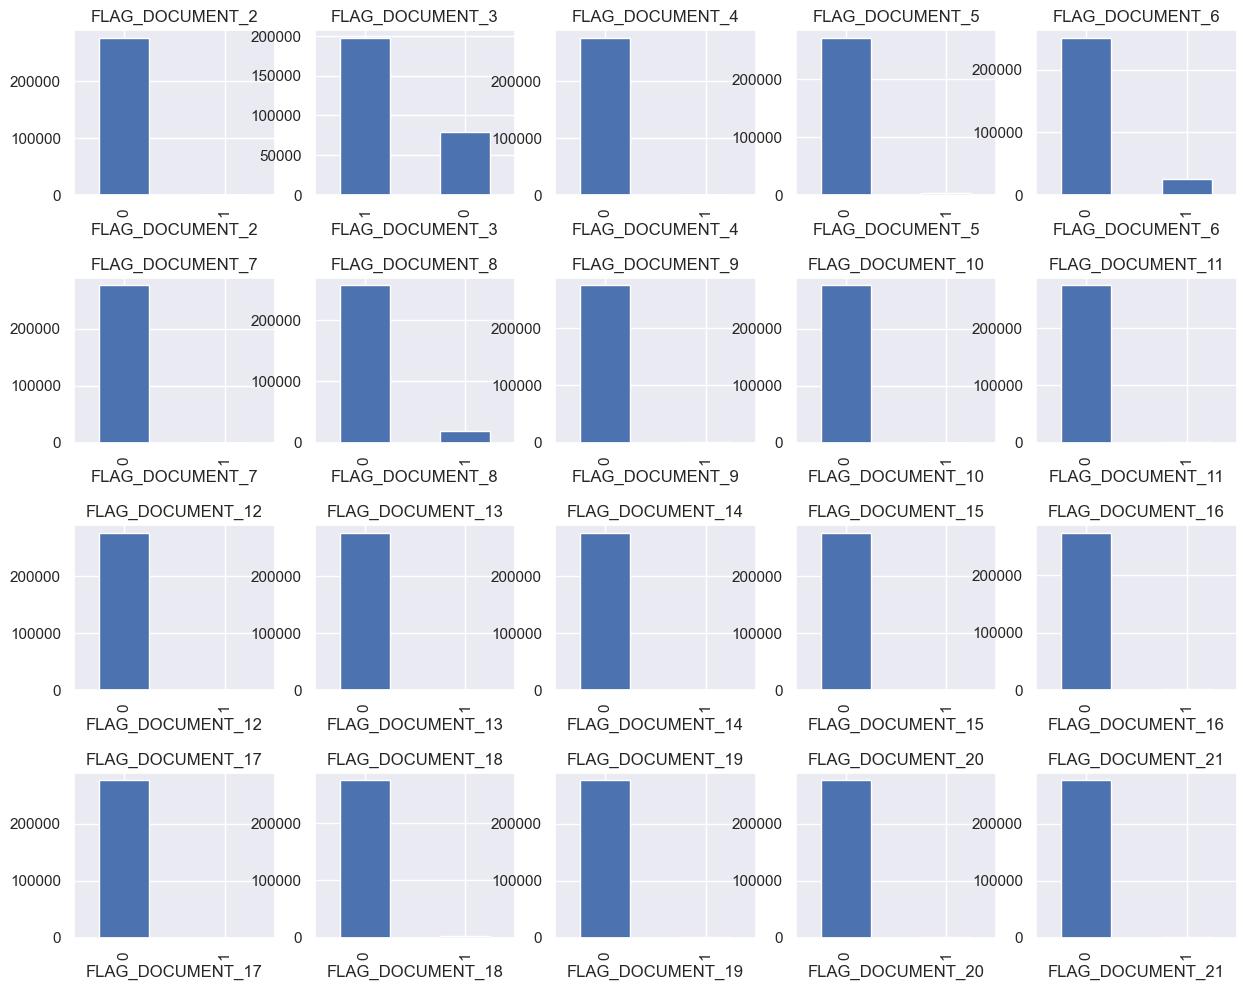

In [56]:
# Plotting all the FLAG_DOCUMENT columns to check data imbalance
k=0
plt.figure(figsize=(15,15))
for i in range(2,22) :    
    k=k+1
    plt.subplot(5, 5,k)    
    col_name = 'FLAG_DOCUMENT_'+str(i)
    df_app[col_name].value_counts().plot(kind='bar')
    plt.subplots_adjust(hspace=0.5)
    plt.title(col_name)
plt.show()

As we can see that except **FLAG_DOCUMENT_3** all the columns have negligible count of 1s.
So we are removing all the FLAG_DOCUMENT columns except FLAG_DOCUMENT_3

In [58]:
# Delete all teh FLAG_DOCUMENT columns except FLAG_DOCUMENT_3
df_app=df_app.drop(["FLAG_DOCUMENT_2"],axis=1)
for i in range(4,22):
    col = 'FLAG_DOCUMENT_'+str(i)
    df_app.drop(col,axis=1,inplace=True)

In [59]:
df_app.shape

(275984, 29)

In [60]:
df_app.info()

<class 'pandas.core.frame.DataFrame'>
Index: 275984 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   275984 non-null  int64  
 1   TARGET                       275984 non-null  int64  
 2   NAME_CONTRACT_TYPE           275984 non-null  object 
 3   CODE_GENDER                  275984 non-null  object 
 4   FLAG_OWN_CAR                 275984 non-null  object 
 5   FLAG_OWN_REALTY              275984 non-null  object 
 6   CNT_CHILDREN                 275984 non-null  int64  
 7   AMT_INCOME_TOTAL             275984 non-null  float64
 8   AMT_CREDIT                   275984 non-null  float64
 9   AMT_ANNUITY                  275984 non-null  float64
 10  AMT_GOODS_PRICE              275984 non-null  float64
 11  NAME_INCOME_TYPE             275984 non-null  object 
 12  NAME_EDUCATION_TYPE          275984 non-null  object 
 13  NAME

#### Binning of `AGE`,  `AMT_INCOME_TOTAL`, `AMT_CREDIT` and `EXT_SOURCE_SCORE` columns


#### Creating three age groups - Young, Mid age and Senior citizen

In [63]:
# Define function for categorizing AGE_GROUP (Young, Mid age and Senior)
def age_group(x):
    if (x < 40):
        return 'Young'
    elif (x >= 40 and x < 60):
        return 'Mid Age'
    else:
        return 'Senior'

In [64]:
#Creating new column AGE_GROUP
df_app['AGE_GROUP'] = df_app['AGE'].apply(age_group)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION  \
0  ...                           0                          0   
1  ...                           0                          0   
2  ...                           0                          0   
3  ...                           0                          0   
4  ...                           0                          0   

        ORGANIZATION_TYPE EXT_SOURCE_2 EXT_SOURCE_3  FLAG_DOCUMENT_3  \
0  Business Entity Type 3     0.262949     0.139376                1   
1                  School     0.622246     0.510853                1   
2              Government     0.555912     0.729567                0   
3  Business Entity Type 3     0.650442     0.510853                1   
4                Religion     0.322738     0.510853                0   

   AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  AGE_GROUP  
0                        0.0   26               2      Young  
1                        0.0   46               4    Mid Age  
2                        0.0   53               1    Mid Age  
3                        0.0   53               9    Mid Age  
4                        0.0   55               9    Mid Age  

[5 rows x 30 columns]

#### Creating three credit amount groups - High, medium and low

In [66]:
# Define function for categorizing CREDIT_GROUP (High, Medium and Low)
def credit_group(x):
    if (x < 500000):
        return 'Low'
    elif (x >= 500000 and x < 750000):
        return 'Medium'
    else:
        return 'High'

In [67]:
#Creating new column AGE_GROUP
df_app['CREDIT_GROUP'] = df_app['AMT_CREDIT'].apply(credit_group)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  REG_REGION_NOT_WORK_REGION       ORGANIZATION_TYPE EXT_SOURCE_2  \
0  ...                           0  Business Entity Type 3     0.262949   
1  ...                           0                  School     0.622246   
2  ...                           0              Government     0.555912   
3  ...                           0  Business Entity Type 3     0.650442   
4  ...                           0                Religion     0.322738   

  EXT_SOURCE_3 FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_QRT  AGE  \
0     0.139376               1                        0.0   26   
1     0.510853               1                        0.0   46   
2     0.729567               0                        0.0   53   
3     0.510853               1                        0.0   53   
4     0.510853               0                        0.0   55   

   YEARS_EMPLOYED  AGE_GROUP  CREDIT_GROUP  
0               2      Young           Low  
1               4    Mid Age          High  
2               1    Mid Age           Low  
3               9    Mid Age           Low  
4               9    Mid Age        Medium  

[5 rows x 31 columns]

#### Creating three income groups - Hign, medium and Low

In [69]:
# Define function for categorizing AMT_INCOME_TOTAL (Low, Medium and High)
def income_group(x):
    if (x < 100000):
        return 'Low'
    elif(x >= 100000 and x < 150000):
        return 'Medium'
    else:
        return 'High'

In [70]:
# Creating column INCOME_GROUP with AMT_INCOME_TOTAL (Low, Medium and High)
df_app['INCOME_GROUP'] = df_app['AMT_INCOME_TOTAL'].apply(income_group)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...       ORGANIZATION_TYPE EXT_SOURCE_2 EXT_SOURCE_3 FLAG_DOCUMENT_3  \
0  ...  Business Entity Type 3     0.262949     0.139376               1   
1  ...                  School     0.622246     0.510853               1   
2  ...              Government     0.555912     0.729567               0   
3  ...  Business Entity Type 3     0.650442     0.510853               1   
4  ...                Religion     0.322738     0.510853               0   

  AMT_REQ_CREDIT_BUREAU_QRT  AGE  YEARS_EMPLOYED  AGE_GROUP  CREDIT_GROUP  \
0                       0.0   26               2      Young           Low   
1                       0.0   46               4    Mid Age          High   
2                       0.0   53               1    Mid Age           Low   
3                       0.0   53               9    Mid Age           Low   
4                       0.0   55               9    Mid Age        Medium   

   INCOME_GROUP  
0          High  
1          High  
2           Low  
3        Medium  
4        Medium  

[5 rows x 32 columns]

For the simplification of analysis of Normalized score from external data source, we are taking average of two different external data sources (EXT_SOURCE_2 and EXT_SOURCE_3) and creating a column called **EXT_SOURCE_SCORE**


In [72]:
df_app['EXT_SOURCE_SCORE'] = round(((df_app['EXT_SOURCE_2'] + df_app['EXT_SOURCE_3'])/2),2)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  EXT_SOURCE_2 EXT_SOURCE_3 FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT  \
0  ...      0.262949     0.139376               1                       0.0   
1  ...      0.622246     0.510853               1                       0.0   
2  ...      0.555912     0.729567               0                       0.0   
3  ...      0.650442     0.510853               1                       0.0   
4  ...      0.322738     0.510853               0                       0.0   

  AGE  YEARS_EMPLOYED  AGE_GROUP  CREDIT_GROUP  INCOME_GROUP  EXT_SOURCE_SCORE  
0  26               2      Young           Low          High              0.20  
1  46               4    Mid Age          High          High              0.57  
2  53               1    Mid Age           Low           Low              0.64  
3  53               9    Mid Age           Low        Medium              0.58  
4  55               9    Mid Age        Medium        Medium              0.42  

[5 rows x 33 columns]

In [73]:
# Dropping (EXT_SOURCE_2 and EXT_SOURCE_3 columns
df_app.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis=1,inplace=True)

#### Creating three External source score groups - High, Medium and Low

In [75]:
# Define function for categorizing EXT_SOURCE_SCORE (Low, Medium and High)
def ext_source_group(x):
    if (x < 0.4):
        return 'Low'
    elif (x >= 0.4 and x < 0.6):
        return 'Medium'
    else:
        return 'High'

In [76]:
# Creating column EXT_SCORE_CATEGORY with High, medium and Low
df_app['EXT_SCORE_CATEGORY'] = df_app['EXT_SOURCE_SCORE'].apply(ext_source_group)
df_app.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...       ORGANIZATION_TYPE FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT AGE  \
0  ...  Business Entity Type 3               1                       0.0  26   
1  ...                  School               1                       0.0  46   
2  ...              Government               0                       0.0  53   
3  ...  Business Entity Type 3               1                       0.0  53   
4  ...                Religion               0                       0.0  55   

  YEARS_EMPLOYED  AGE_GROUP  CREDIT_GROUP  INCOME_GROUP  EXT_SOURCE_SCORE  \
0              2      Young           Low          High              0.20   
1              4    Mid Age          High          High              0.57   
2              1    Mid Age           Low           Low              0.64   
3              9    Mid Age           Low        Medium              0.58   
4              9    Mid Age        Medium        Medium              0.42   

   EXT_SCORE_CATEGORY  
0                 Low  
1              Medium  
2                High  
3              Medium  
4              Medium  

[5 rows x 32 columns]

In [77]:
# Remove rows where CODE_GENDER == XNA
# There are four such rows
df_app = df_app[~(df_app['CODE_GENDER'] == 'XNA')]

### Divide data into two sets 
##### Client with payment difficulties (Target=1) 
##### All other cases (Target=0) 

In [79]:
# Client with payment difficulties (Target=1)
df_current_target_1 = df_app[df_app['TARGET'] == 1]
df_current_target_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    ...       ORGANIZATION_TYPE FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT AGE  \
0   ...  Business Entity Type 3               1                       0.0  26   
26  ...  Business Entity Type 3               1                       2.0  52   
40  ...  Business Entity Type 3               1                       0.0  48   
42  ...           Self-employed               1                       0.0  37   
81  ...                     XNA               0                       0.0  68   

   YEARS_EMPLOYED  AGE_GROUP  CREDIT_GROUP  INCOME_GROUP  EXT_SOURCE_SCORE  \
0               2      Young           Low          High              0.20   
26              8    Mid Age          High        Medium              0.37   
40              4    Mid Age          High          High              0.31   
42             10      Young           Low        Medium              0.54   
81           1000     Senior           Low           Low              0.37   

    EXT_SCORE_CATEGORY  
0                  Low  
26                 Low  
40                 Low  
42              Medium  
81                 Low  

[5 rows x 32 columns]

In [80]:
# Client with all other cases (Target=0)
df_current_target_0 = df_app[df_app['TARGET'] == 0]
df_current_target_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   

   ...       ORGANIZATION_TYPE FLAG_DOCUMENT_3 AMT_REQ_CREDIT_BUREAU_QRT AGE  \
1  ...                  School               1                       0.0  46   
2  ...              Government               0                       0.0  53   
3  ...  Business Entity Type 3               1                       0.0  53   
4  ...                Religion               0                       0.0  55   
5  ...                   Other               1                       1.0  47   

  YEARS_EMPLOYED  AGE_GROUP  CREDIT_GROUP  INCOME_GROUP  EXT_SOURCE_SCORE  \
1              4    Mid Age          High          High              0.57   
2              1    Mid Age           Low           Low              0.64   
3              9    Mid Age           Low        Medium              0.58   
4              9    Mid Age        Medium        Medium              0.42   
5              5    Mid Age           Low           Low              0.49   

   EXT_SCORE_CATEGORY  
1              Medium  
2                High  
3              Medium  
4              Medium  
5              Medium  

[5 rows x 32 columns]

In [81]:
df_current_target_1.shape

(23112, 32)

In [82]:
df_current_target_0.shape

(252868, 32)

## Univariate analysis for Unordered categorical variables

#### Count of defaulters and non-defaulters on the basis of gender

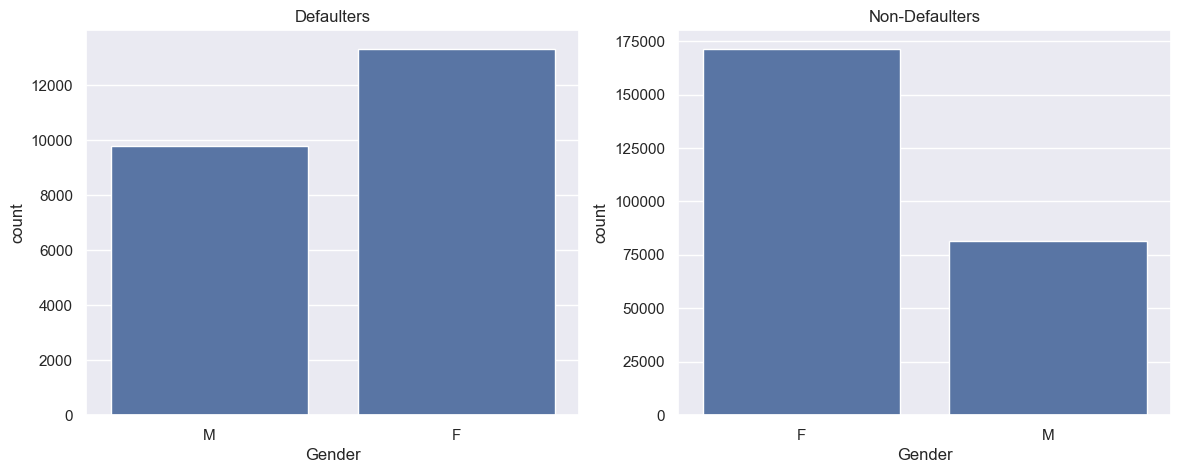

In [85]:
# Plotting two plots for delaulters and non defaulters on basis of gender
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CODE_GENDER',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')
plt.show()


1. **Defaluters** - We can see that females are slightly more in number of defaulters than male.
2. **Non-defaluters** - The same pattern continues for non-defaluters as well. The females are more in number here than male.

#### Defaulters and non-defaulters on the basis of Loan type

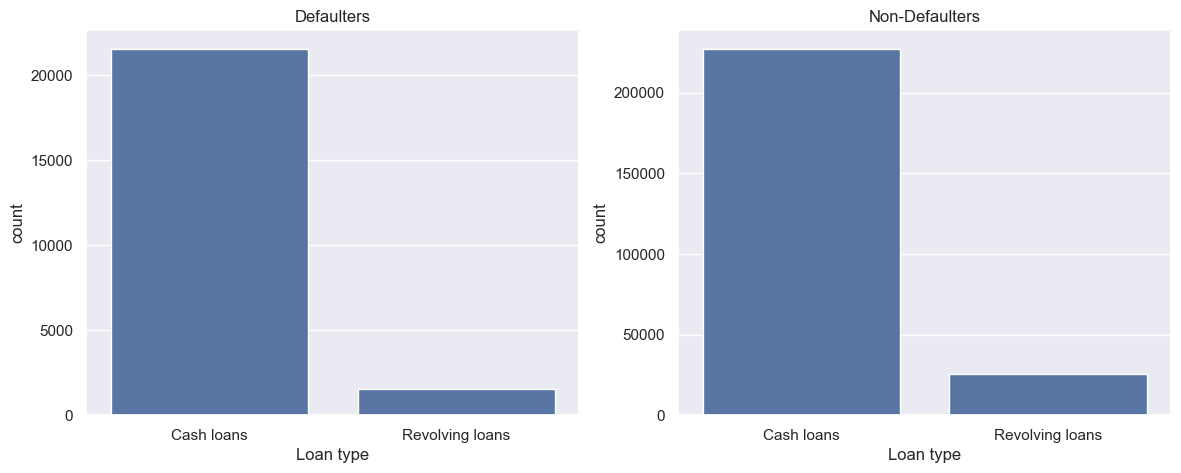

In [88]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_CONTRACT_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')
plt.show()

##### Analysis
We see in both the cases that Revolving loans are very less in number compared to Cash loans.

#### Defaulters and non-defaulters on the basis of Income type

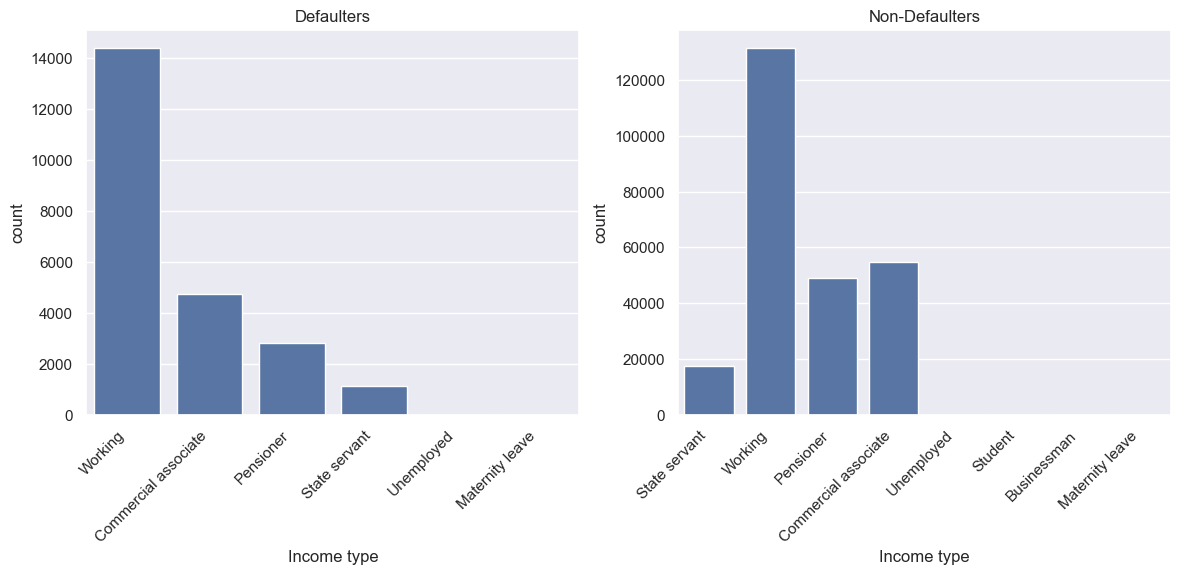

In [91]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_INCOME_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Income type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

#### Analysis
1. **Defaulters** - Working people are mostly defaulted as their numbers are high with compare to other pfrofessions.
2. **Non-defaulters** - Similarly here also working people are more in number who are not defaulted.

#### Defaulters and non-defaulters on the basis of Education type

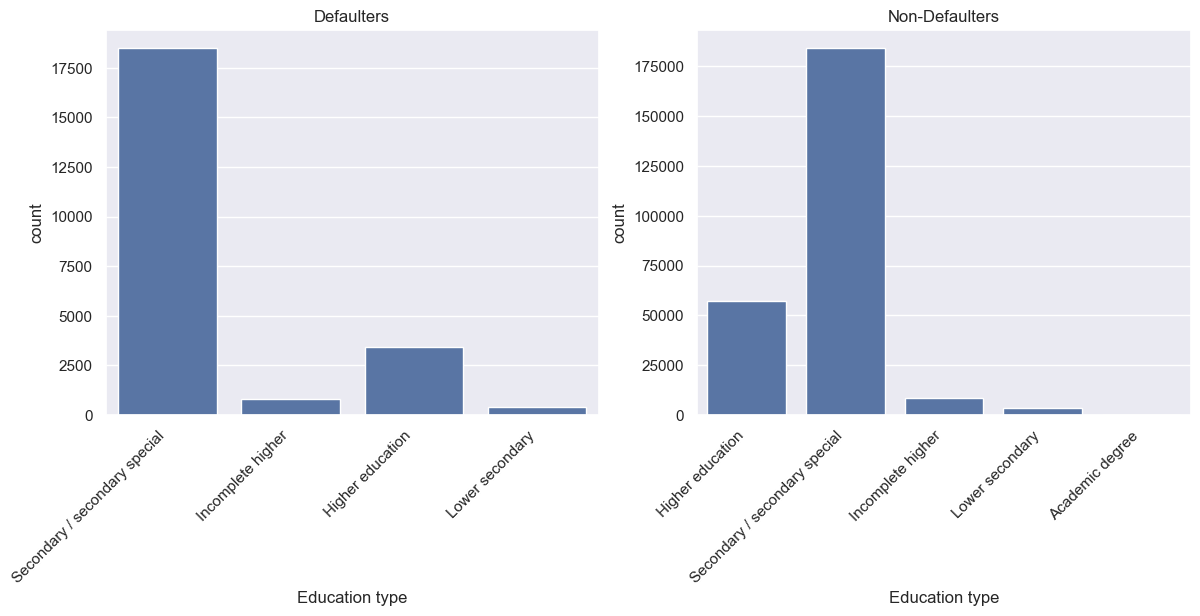

In [94]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_EDUCATION_TYPE',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Education type')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

plt.show()

##### Analysis
1. **Defaulters** - Education with Secondary/Secondary sepcial customers are more number in defaulters comapre with other level of eduacted poeple.
2. **Non defaulters** - Here also Secondary/Secondary sepcial are more in numbers.

#### Defaulters and non-defaulters on the basis of Family status

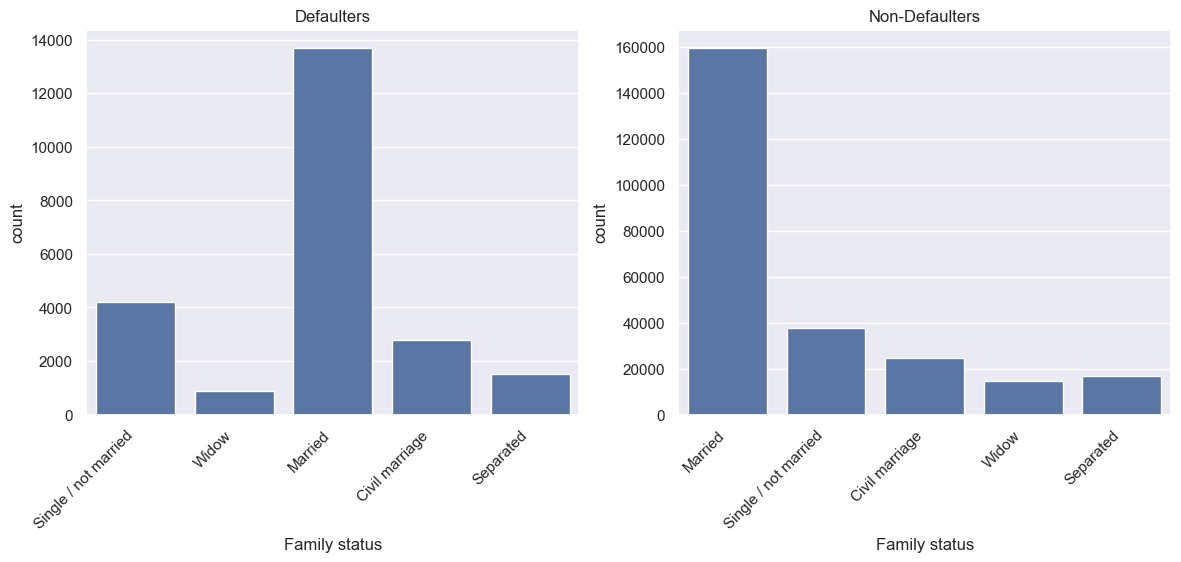

In [97]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_1)
plt.title('Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')


plt.subplot(1,2,2) 
ax = sns.countplot(x = 'NAME_FAMILY_STATUS',data=df_current_target_0)
plt.title('Non-Defaulters')
ax.set(xlabel='Family status')
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Analysis
For both the customers (defaulters and non-defaulters) married people are more in number comapred with single, separated, widow etc.

### Univariate analysis for continious variables

#### Defaulters and non-defaulters on the basis of credit amount of the loan

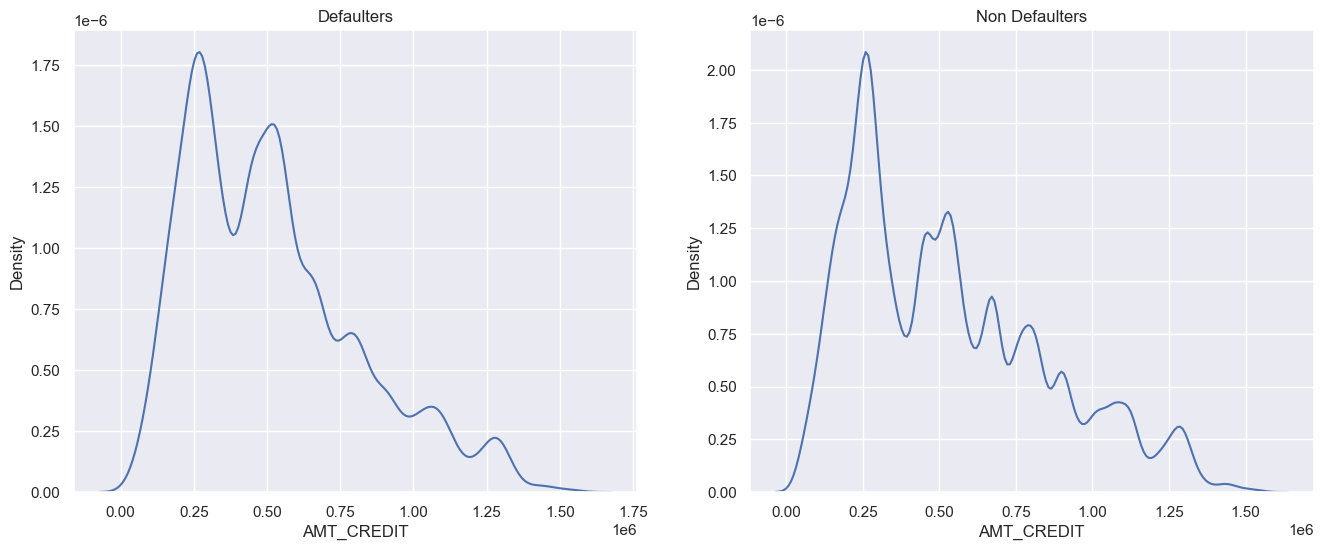

In [101]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_CREDIT'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_CREDIT'],hist=False)
plt.show()

##### Analysis
1. **Defaulters** - We can notice that the lesser the credit amount of the loan, the more chances of being defaulter. The spike is till 500000.
2. **Non defaulters** - If the credit amount is less, there is lesser chance of being defaulted. And gradually the chance is being decreased with the loan credit amount.

#### Defaulters and non-defaulters on the basis of gender and their total income

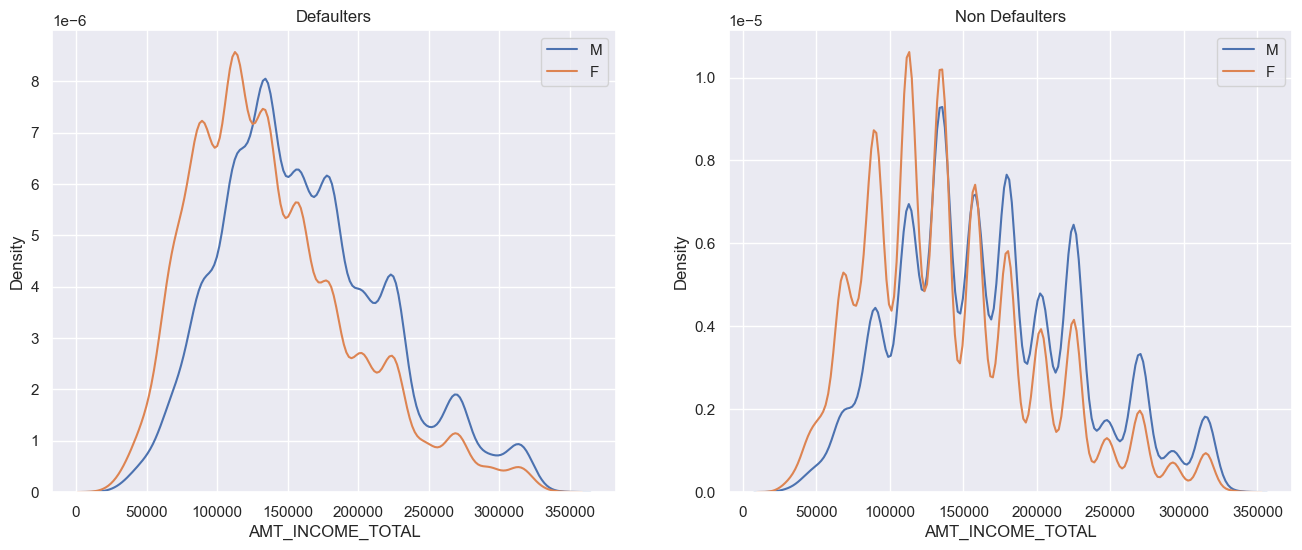

In [104]:
gender = ['M','F']
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
for i in gender:
    subset = df_current_target_1[df_current_target_1['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    plt.legend()  
plt.subplot(1,2,2) 
plt.title('Non Defaulters')
for i in gender:
    subset = df_current_target_0[df_current_target_0['CODE_GENDER'] == i]
    sns.distplot(subset['AMT_INCOME_TOTAL'],hist=False,label=i)
    plt.legend()
plt.show()

##### Analysis
1. **Defaulters** - We can notice by looking at the pattern that for being a defaulter both the genders (male and female) are almost equal in all income levels. The spike of being defaulters is from 50000 to 200000.
2. **Non defaulters** - Here we see an interesting pattern. Females are more non defaulter on the lower income level but lesser non defaluter in higher income level. The spike is more for both the genders from 75000 to 150000.

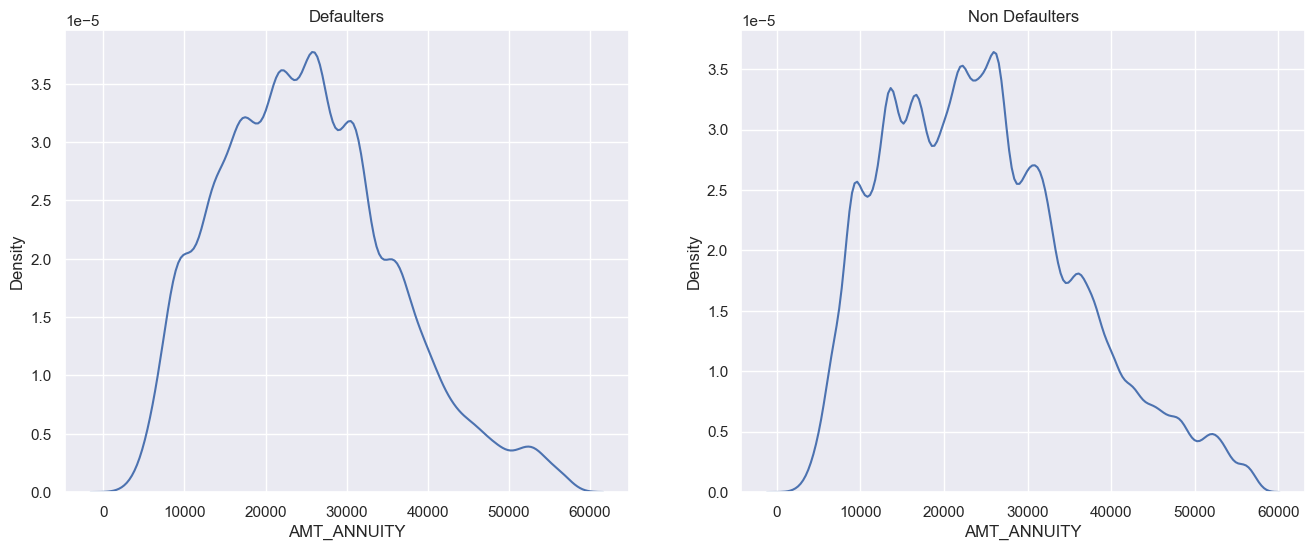

In [106]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1) 
plt.title('Defaulters')
sns.distplot(df_current_target_1['AMT_ANNUITY'],hist=False)

plt.subplot(1,2,2) 
plt.title('Non Defaulters')
sns.distplot(df_current_target_0['AMT_ANNUITY'],hist=False)
plt.show()

##### Analysis
We can notice from the above distribution plot that in both the cases the loan annuity is concentrated more from 10000 to 40000. 

### Segmented Univariate analysis for ordered categorical variables

#### Percentage of age group applicants defaulted and not defaulted
The analysis below showed that the how much percentage of each age group(Young, Mid age and Senior citizen) applicants are defaulted and not defaulted.

In [110]:
# Taking the percentage of each age group who was defaulted.
# Divide each defaulted age group count by total count of that age group
young_1 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Young') & (df_app['TARGET'] == 1)])/len(df_app[df_app['AGE_GROUP'] == 'Young']),2)
midage_1 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Mid Age') & (df_app['TARGET'] == 1)])/len(df_app[df_app['AGE_GROUP'] == 'Mid Age']),2)
senior_1 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Senior') & (df_app['TARGET'] == 1)])/len(df_app[df_app['AGE_GROUP'] == 'Senior']),2)

In [111]:
# Creating a dataframe of the defaulted age group percentage
agegroup_default = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_1, midage_1, senior_1]} 
df_agegroup_default = pd.DataFrame(agegroup_default) 
df_agegroup_default

AGE_GROUP  Percentage
0     Young       10.79
1   Mid Age        7.37
2    Senior        5.08

In [112]:
# Taking the percentage of each age group who was not defaulted.
# Divide each non defaulted age group count by total count of that age group
young_0 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Young') & (df_app['TARGET'] == 0)])/len(df_app[df_app['AGE_GROUP'] == 'Young']),2)
midage_0 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Mid Age') & (df_app['TARGET'] == 0)])/len(df_app[df_app['AGE_GROUP'] == 'Mid Age']),2)
senior_0 = round(100*len(df_app[(df_app['AGE_GROUP'] == 'Senior') & (df_app['TARGET'] == 0)])/len(df_app[df_app['AGE_GROUP'] == 'Senior']),2)

In [113]:
# Creating a dataframe of the non defaulted age group percentage
agegroup_nondefault = {'AGE_GROUP':['Young', 'Mid Age', 'Senior'], 'Percentage':[young_0, midage_0, senior_0]} 
df_agegroup_nondefault = pd.DataFrame(agegroup_nondefault) 
df_agegroup_nondefault

AGE_GROUP  Percentage
0     Young       89.21
1   Mid Age       92.63
2    Senior       94.92

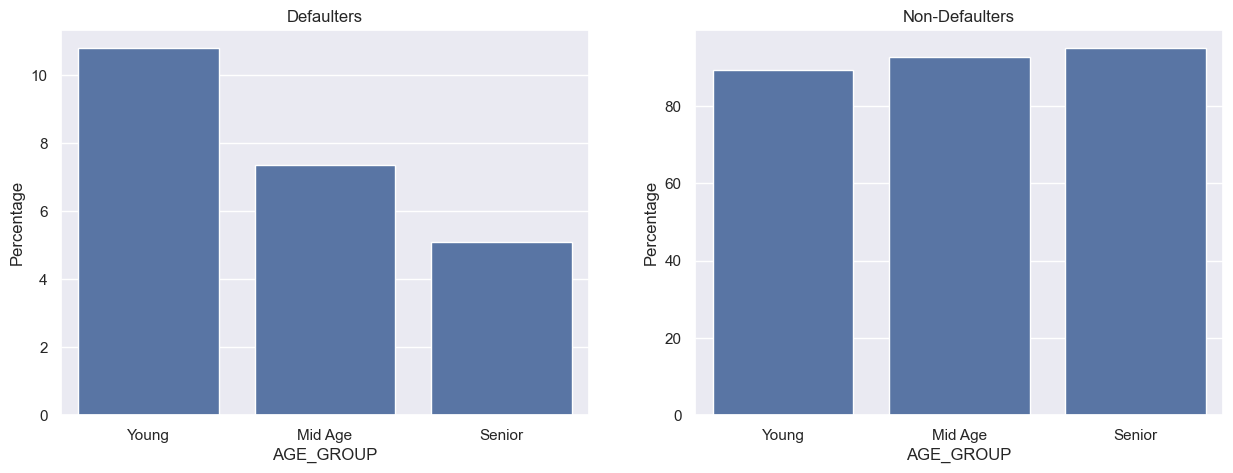

In [114]:
# Plotting the above two dataframes
plt.figure(figsize=(15,5))

plt.subplot(1,2,1) 
sns.barplot(x='AGE_GROUP',y='Percentage',data=df_agegroup_default)
plt.title('Defaulters')

plt.subplot(1,2,2)
sns.barplot(x='AGE_GROUP',y='Percentage',data=agegroup_nondefault)
plt.title('Non-Defaulters')
plt.show()

##### Analysis
1. **Defaulters** - We see that Young people are more likely to default than other two age groups. Whereas, Senior citizens are less likely to default than others.
2. **Non defaulters** - There is not much difference in the likelihood for non defaulters in the age groups.

#### Credit amount group

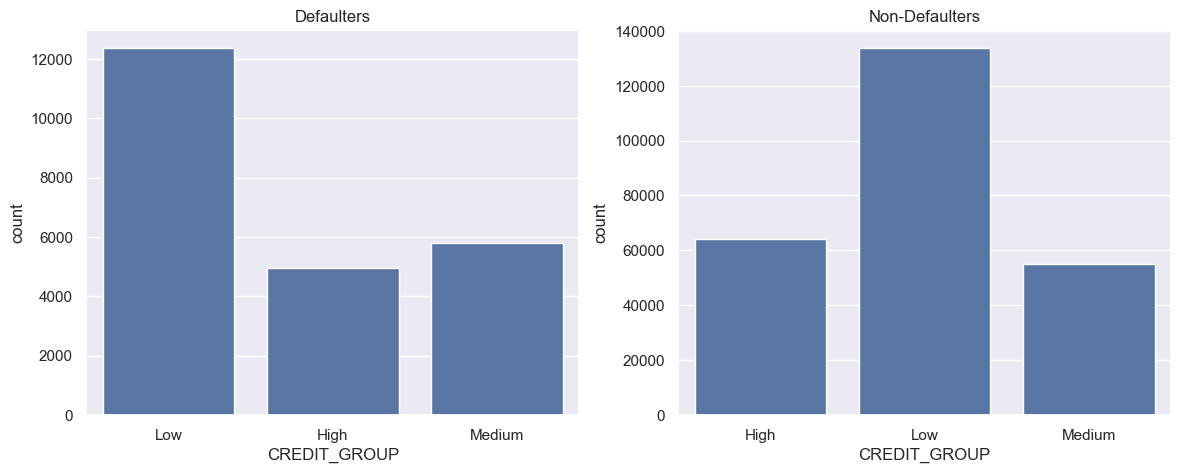

In [117]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'CREDIT_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Analysis
1. **Defaulters** - Surprisingly low credited amount groups are more defaulters.
2. **Non defaulters** - As expected low credit amount groups are more in number, who were not defaulted.

#### Income group

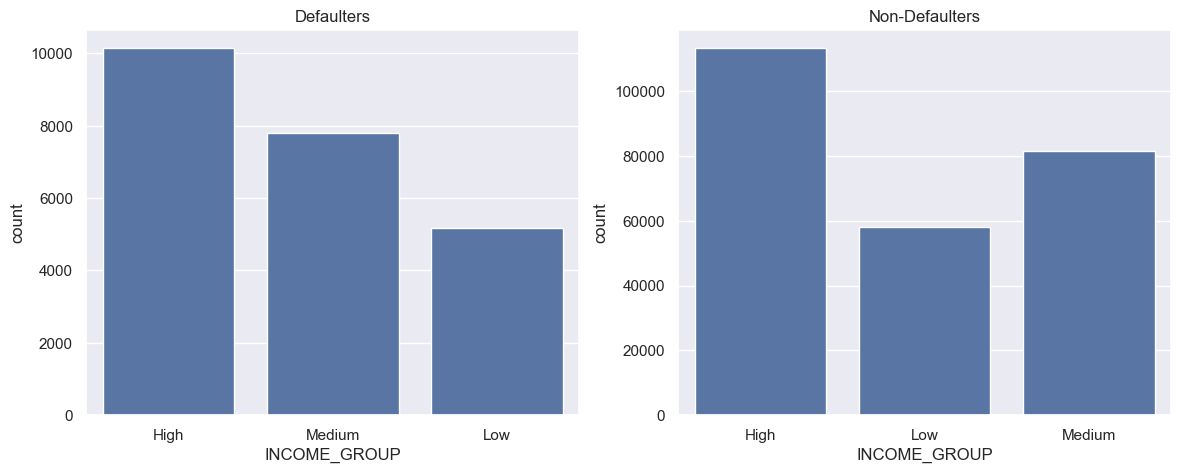

In [120]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'INCOME_GROUP',data=df_current_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Analysis
1. **Defaulters** - Surprisingly the High income group is more in number to be defaulted, then Medium and then Low.
2. **Non defaulters** - Here as expected the count of non defaulters more in High income group and less in low income group.

#### Normalized score from external data source

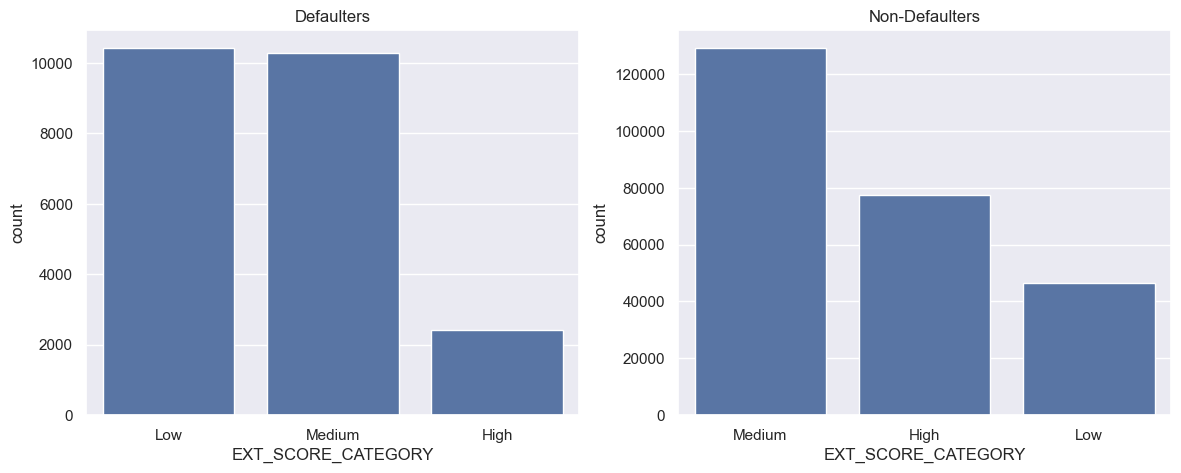

In [123]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)    
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2) 
ax = sns.countplot(x = 'EXT_SCORE_CATEGORY',data=df_current_target_0)
plt.title('Non-Defaulters')
plt.show()

##### Analysis
1. **Defaulters** - No surprise that low scorer from external data source are more defaulters. Also, the medium scorer are as likely defaulter as low scorer.
2. **Non defaulters** - Medium scorers are no more defaulted than High scorer. As expected the Low scorers are lesser in number.

# Bivariate analysis

#### Corelation of relevant numerical columns for defaulters and non defaulters

In [127]:
# Listing the relevant columns for finding corelation
corr_cols =  ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','EXT_SOURCE_SCORE', 'REG_REGION_NOT_WORK_REGION', 
              'REGION_RATING_CLIENT',"CNT_FAM_MEMBERS", 'CNT_CHILDREN',
             'REGION_RATING_CLIENT_W_CITY', 'REGION_RATING_CLIENT']

##### Corelation of defaulters 

In [129]:
# Creating dataframe for numerical columns
df_corr_target_1 = df_current_target_1[corr_cols]
df_corr_target_1.head()


AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
0           202500.0    406597.5      24700.5         351000.0   26   
26          112500.0    979992.0      27076.5         702000.0   52   
40          202500.0   1193580.0      35028.0         855000.0   48   
42          135000.0    288873.0      16258.5         238500.0   37   
81           81000.0    252000.0      14593.5         252000.0   68   

    EXT_SOURCE_SCORE  REG_REGION_NOT_WORK_REGION  REGION_RATING_CLIENT  \
0               0.20                           0                     2   
26              0.37                           0                     3   
40              0.31                           0                     2   
42              0.54                           0                     3   
81              0.37                           0                     2   

    CNT_FAM_MEMBERS  CNT_CHILDREN  REGION_RATING_CLIENT_W_CITY  \
0               1.0             0                            2   
26              1.0             0                            2   
40              2.0             0                            2   
42              2.0             0                            3   
81              2.0             0                            2   

    REGION_RATING_CLIENT  
0                      2  
26                     3  
40                     2  
42                     3  
81                     2

In [130]:
# Corelation matrix
df_corr_target_1.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.300536     0.379973   
AMT_CREDIT                           0.300536    1.000000     0.743835   
AMT_ANNUITY                          0.379973    0.743835     1.000000   
AMT_GOODS_PRICE                      0.300847    0.978326     0.741417   
AGE                                 -0.017733    0.134223     0.002448   
EXT_SOURCE_SCORE                     0.032894    0.101060     0.080166   
REG_REGION_NOT_WORK_REGION           0.141793    0.015347     0.048795   
REGION_RATING_CLIENT                -0.141908   -0.037249    -0.043304   
CNT_FAM_MEMBERS                      0.001187    0.059654     0.082902   
CNT_CHILDREN                        -0.005089    0.005424     0.038060   
REGION_RATING_CLIENT_W_CITY         -0.153761   -0.045442    -0.055742   
REGION_RATING_CLIENT                -0.141908   -0.037249    -0.043304   

                             AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL                    0.300847 -0.017733          0.032894   
AMT_CREDIT                          0.978326  0.134223          0.101060   
AMT_ANNUITY                         0.741417  0.002448          0.080166   
AMT_GOODS_PRICE                     1.000000  0.135488          0.109665   
AGE                                 0.135488  1.000000          0.166840   
EXT_SOURCE_SCORE                    0.109665  0.166840          1.000000   
REG_REGION_NOT_WORK_REGION          0.019606 -0.069769         -0.000625   
REGION_RATING_CLIENT               -0.045769 -0.035831         -0.168471   
CNT_FAM_MEMBERS                     0.055829 -0.205684         -0.020277   
CNT_CHILDREN                       -0.001706 -0.259086         -0.026039   
REGION_RATING_CLIENT_W_CITY        -0.052917 -0.034496         -0.169421   
REGION_RATING_CLIENT               -0.045769 -0.035831         -0.168471   

                             REG_REGION_NOT_WORK_REGION  REGION_RATING_CLIENT  \
AMT_INCOME_TOTAL                               0.141793             -0.141908   
AMT_CREDIT                                     0.015347             -0.037249   
AMT_ANNUITY                                    0.048795             -0.043304   
AMT_GOODS_PRICE                                0.019606             -0.045769   
AGE                                           -0.069769             -0.035831   
EXT_SOURCE_SCORE                              -0.000625             -0.168471   
REG_REGION_NOT_WORK_REGION                     1.000000             -0.097319   
REGION_RATING_CLIENT                          -0.097319              1.000000   
CNT_FAM_MEMBERS                               -0.026454              0.044729   
CNT_CHILDREN                                  -0.022133              0.041695   
REGION_RATING_CLIENT_W_CITY                   -0.092940              0.960096   
REGION_RATING_CLIENT                          -0.097319              1.000000   

                             CNT_FAM_MEMBERS  CNT_CHILDREN  \
AMT_INCOME_TOTAL                    0.001187     -0.005089   
AMT_CREDIT                          0.059654      0.005424   
AMT_ANNUITY                         0.082902      0.038060   
AMT_GOODS_PRICE                     0.055829     -0.001706   
AGE                                -0.205684     -0.259086   
EXT_SOURCE_SCORE                   -0.020277     -0.026039   
REG_REGION_NOT_WORK_REGION         -0.026454     -0.022133   
REGION_RATING_CLIENT                0.044729      0.041695   
CNT_FAM_MEMBERS                     1.000000      0.884818   
CNT_CHILDREN                        0.884818      1.000000   
REGION_RATING_CLIENT_W_CITY         0.049142      0.043914   
REGION_RATING_CLIENT                0.044729      0.041695   

                             REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                               -0.153761             -0.141908  
AMT_CREDIT                                     -0.0454

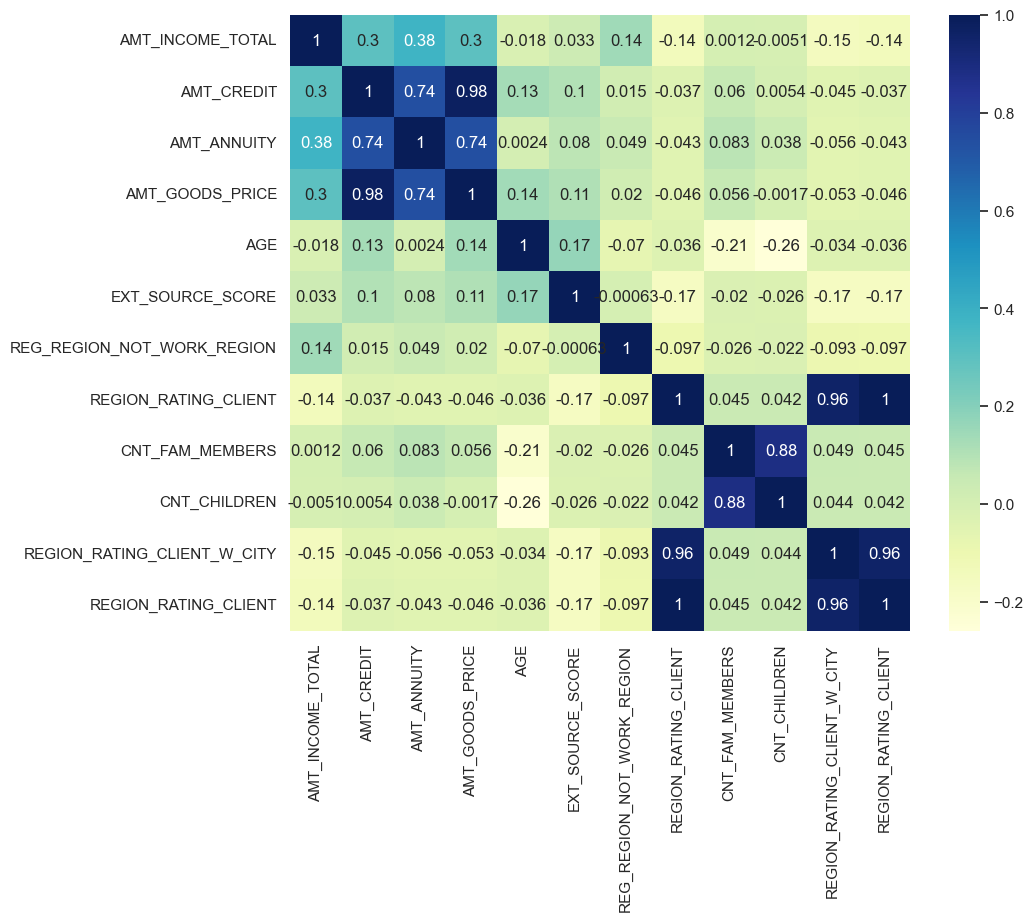

In [131]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_1.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly corelate columns for defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.74)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.74)

#### Corelation of non defaulters 

In [134]:
# Creating dataframe for numerical columns
df_corr_target_0 = df_current_target_0[corr_cols]
df_corr_target_0.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  AGE  \
1          270000.0   1293502.5      35698.5        1129500.0   46   
2           67500.0    135000.0       6750.0         135000.0   53   
3          135000.0    312682.5      29686.5         297000.0   53   
4          121500.0    513000.0      21865.5         513000.0   55   
5           99000.0    490495.5      27517.5         454500.0   47   

   EXT_SOURCE_SCORE  REG_REGION_NOT_WORK_REGION  REGION_RATING_CLIENT  \
1              0.57                           0                     1   
2              0.64                           0                     2   
3              0.58                           0                     2   
4              0.42                           0                     2   
5              0.49                           0                     2   

   CNT_FAM_MEMBERS  CNT_CHILDREN  REGION_RATING_CLIENT_W_CITY  \
1              2.0             0                            1   
2              1.0             0                            2   
3              2.0             0                            2   
4              1.0             0                            2   
5              2.0             0                            2   

   REGION_RATING_CLIENT  
1                     1  
2                     2  
3                     2  
4                     2  
5                     2

In [135]:
# Corelation matrix
df_corr_target_0.corr() 

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                     1.000000    0.325569     0.404494   
AMT_CREDIT                           0.325569    1.000000     0.762762   
AMT_ANNUITY                          0.404494    0.762762     1.000000   
AMT_GOODS_PRICE                      0.328675    0.982246     0.762543   
AGE                                 -0.100555    0.047798    -0.022907   
EXT_SOURCE_SCORE                     0.042235    0.075219     0.067825   
REG_REGION_NOT_WORK_REGION           0.147809    0.024889     0.056896   
REGION_RATING_CLIENT                -0.173463   -0.047222    -0.077640   
CNT_FAM_MEMBERS                      0.028960    0.061596     0.077713   
CNT_CHILDREN                         0.027044    0.004186     0.024214   
REGION_RATING_CLIENT_W_CITY         -0.190776   -0.053171    -0.088471   
REGION_RATING_CLIENT                -0.173463   -0.047222    -0.077640   

                             AMT_GOODS_PRICE       AGE  EXT_SOURCE_SCORE  \
AMT_INCOME_TOTAL                    0.328675 -0.100555          0.042235   
AMT_CREDIT                          0.982246  0.047798          0.075219   
AMT_ANNUITY                         0.762543 -0.022907          0.067825   
AMT_GOODS_PRICE                     1.000000  0.046119          0.082473   
AGE                                 0.046119  1.000000          0.173142   
EXT_SOURCE_SCORE                    0.082473  0.173142          1.000000   
REG_REGION_NOT_WORK_REGION          0.026011 -0.097218         -0.013207   
REGION_RATING_CLIENT               -0.049075 -0.004739         -0.201100   
CNT_FAM_MEMBERS                     0.059928 -0.289503         -0.019870   
CNT_CHILDREN                       -0.000378 -0.339919         -0.037040   
REGION_RATING_CLIENT_W_CITY        -0.054128 -0.003202         -0.196714   
REGION_RATING_CLIENT               -0.049075 -0.004739         -0.201100   

                             REG_REGION_NOT_WORK_REGION  REGION_RATING_CLIENT  \
AMT_INCOME_TOTAL                               0.147809             -0.173463   
AMT_CREDIT                                     0.024889             -0.047222   
AMT_ANNUITY                                    0.056896             -0.077640   
AMT_GOODS_PRICE                                0.026011             -0.049075   
AGE                                           -0.097218             -0.004739   
EXT_SOURCE_SCORE                              -0.013207             -0.201100   
REG_REGION_NOT_WORK_REGION                     1.000000             -0.122804   
REGION_RATING_CLIENT                          -0.122804              1.000000   
CNT_FAM_MEMBERS                                0.004660              0.031882   
CNT_CHILDREN                                   0.010262              0.025337   
REGION_RATING_CLIENT_W_CITY                   -0.116908              0.950873   
REGION_RATING_CLIENT                          -0.122804              1.000000   

                             CNT_FAM_MEMBERS  CNT_CHILDREN  \
AMT_INCOME_TOTAL                    0.028960      0.027044   
AMT_CREDIT                          0.061596      0.004186   
AMT_ANNUITY                         0.077713      0.024214   
AMT_GOODS_PRICE                     0.059928     -0.000378   
AGE                                -0.289503     -0.339919   
EXT_SOURCE_SCORE                   -0.019870     -0.037040   
REG_REGION_NOT_WORK_REGION          0.004660      0.010262   
REGION_RATING_CLIENT                0.031882      0.025337   
CNT_FAM_MEMBERS                     1.000000      0.876575   
CNT_CHILDREN                        0.876575      1.000000   
REGION_RATING_CLIENT_W_CITY         0.033350      0.024753   
REGION_RATING_CLIENT                0.031882      0.025337   

                             REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  
AMT_INCOME_TOTAL                               -0.190776             -0.173463  
AMT_CREDIT                                     -0.0531

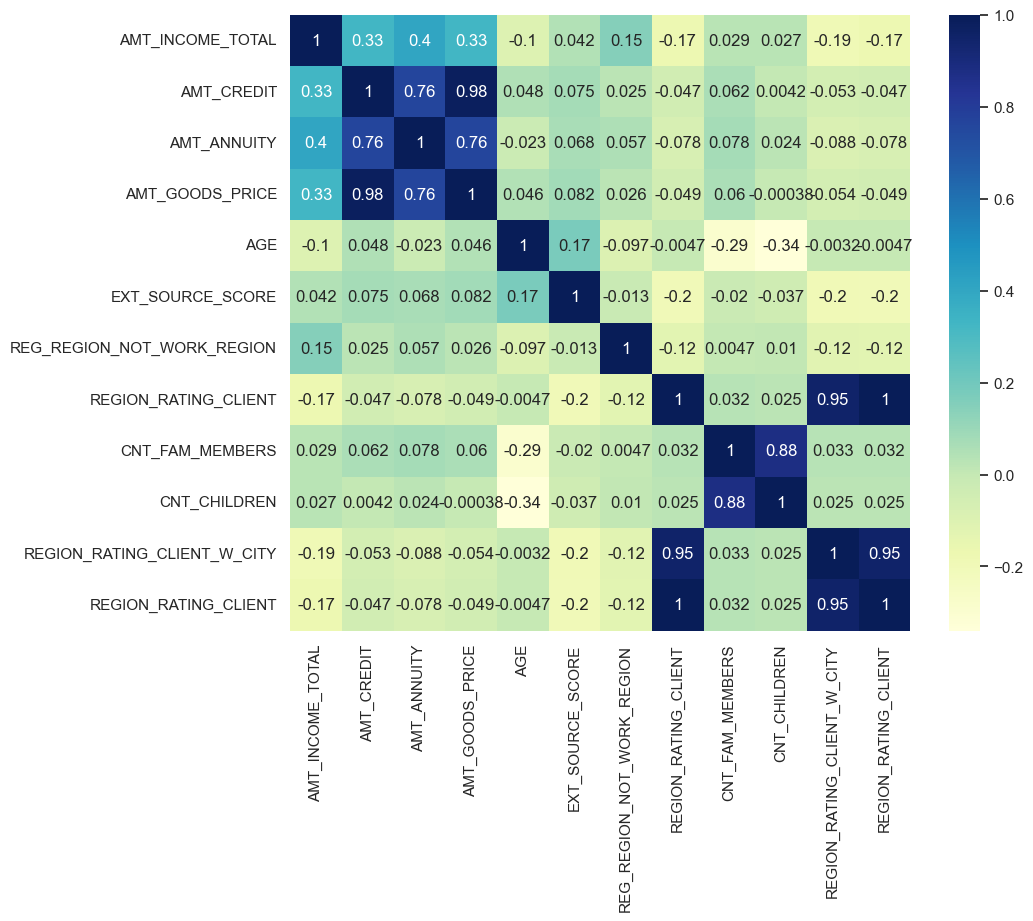

In [136]:
plt.figure(figsize=(10,8))
sns.heatmap(df_corr_target_0.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly corelate columns for non defaulters**
1. AMT_CREDIT and AMT_ANNUITY (0.76)
2. AMT_CREDIT and AMT_GOODS_PRICE (0.98)
3. AMT_ANNUITY and AMT_GOODS_PRICE (0.76)

**Conclusion** - 
We can see that for both defaulters and non defaulters the same pairs of columns are highly corelated.

### Bivariate analysis on continious variable

#### Credit amount of the loan on the basis of client income for both male and female

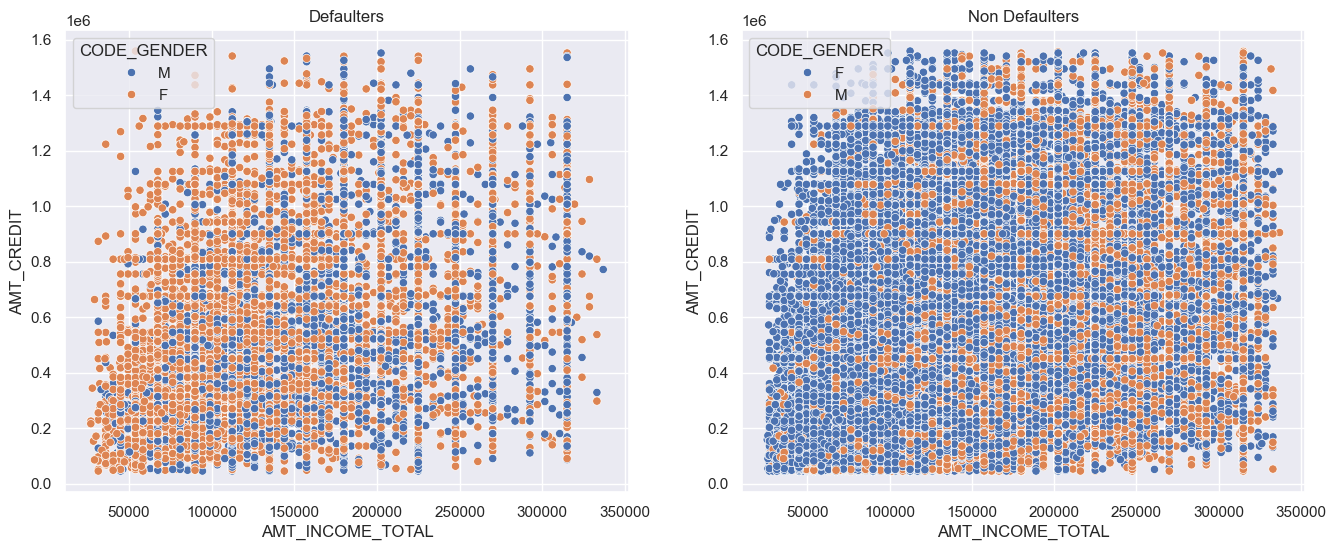

In [141]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue='CODE_GENDER', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_INCOME_TOTAL',y='AMT_CREDIT',hue = 'CODE_GENDER', data=df_current_target_0)
plt.title('Non Defaulters')
plt.show()

##### Analysis
1. **Defaulters** - We can slightly figure out that the values are more concentrated on the lower income and lower credit of the loan. That means as the income is increased, the amount of loan is also increased. This is true for both the genders.
2. **Non defaulters** - We can hardly figure out any pattern out of this.

#### Credit amount of the loan on the basis of Number of enquiries to Credit Bureau about the client

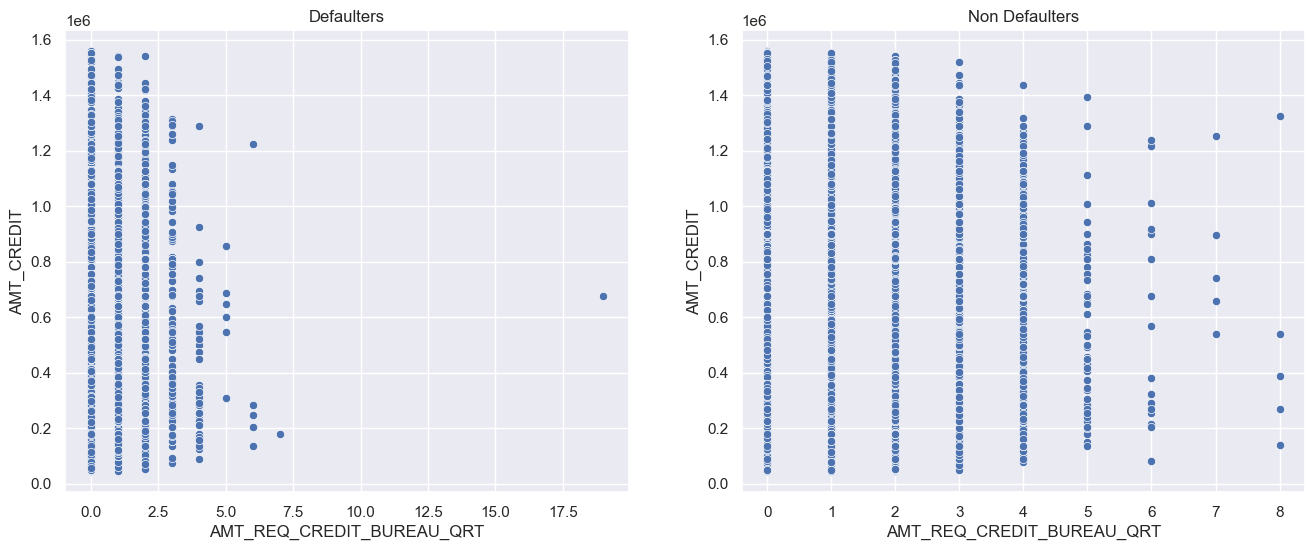

In [144]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT', data=df_current_target_1)
plt.title('Defaulters')

plt.subplot(1,2,2)
ax = sns.scatterplot(x='AMT_REQ_CREDIT_BUREAU_QRT',y='AMT_CREDIT', data=df_current_target_0)
plt.title('Non Defaulters')
plt.show()

##### Analysis
We see that the more number of enquiries the lesser the amount of loan credited for both defaulters and non defaulters.

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [148]:
# Category list
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

#### Defaulters

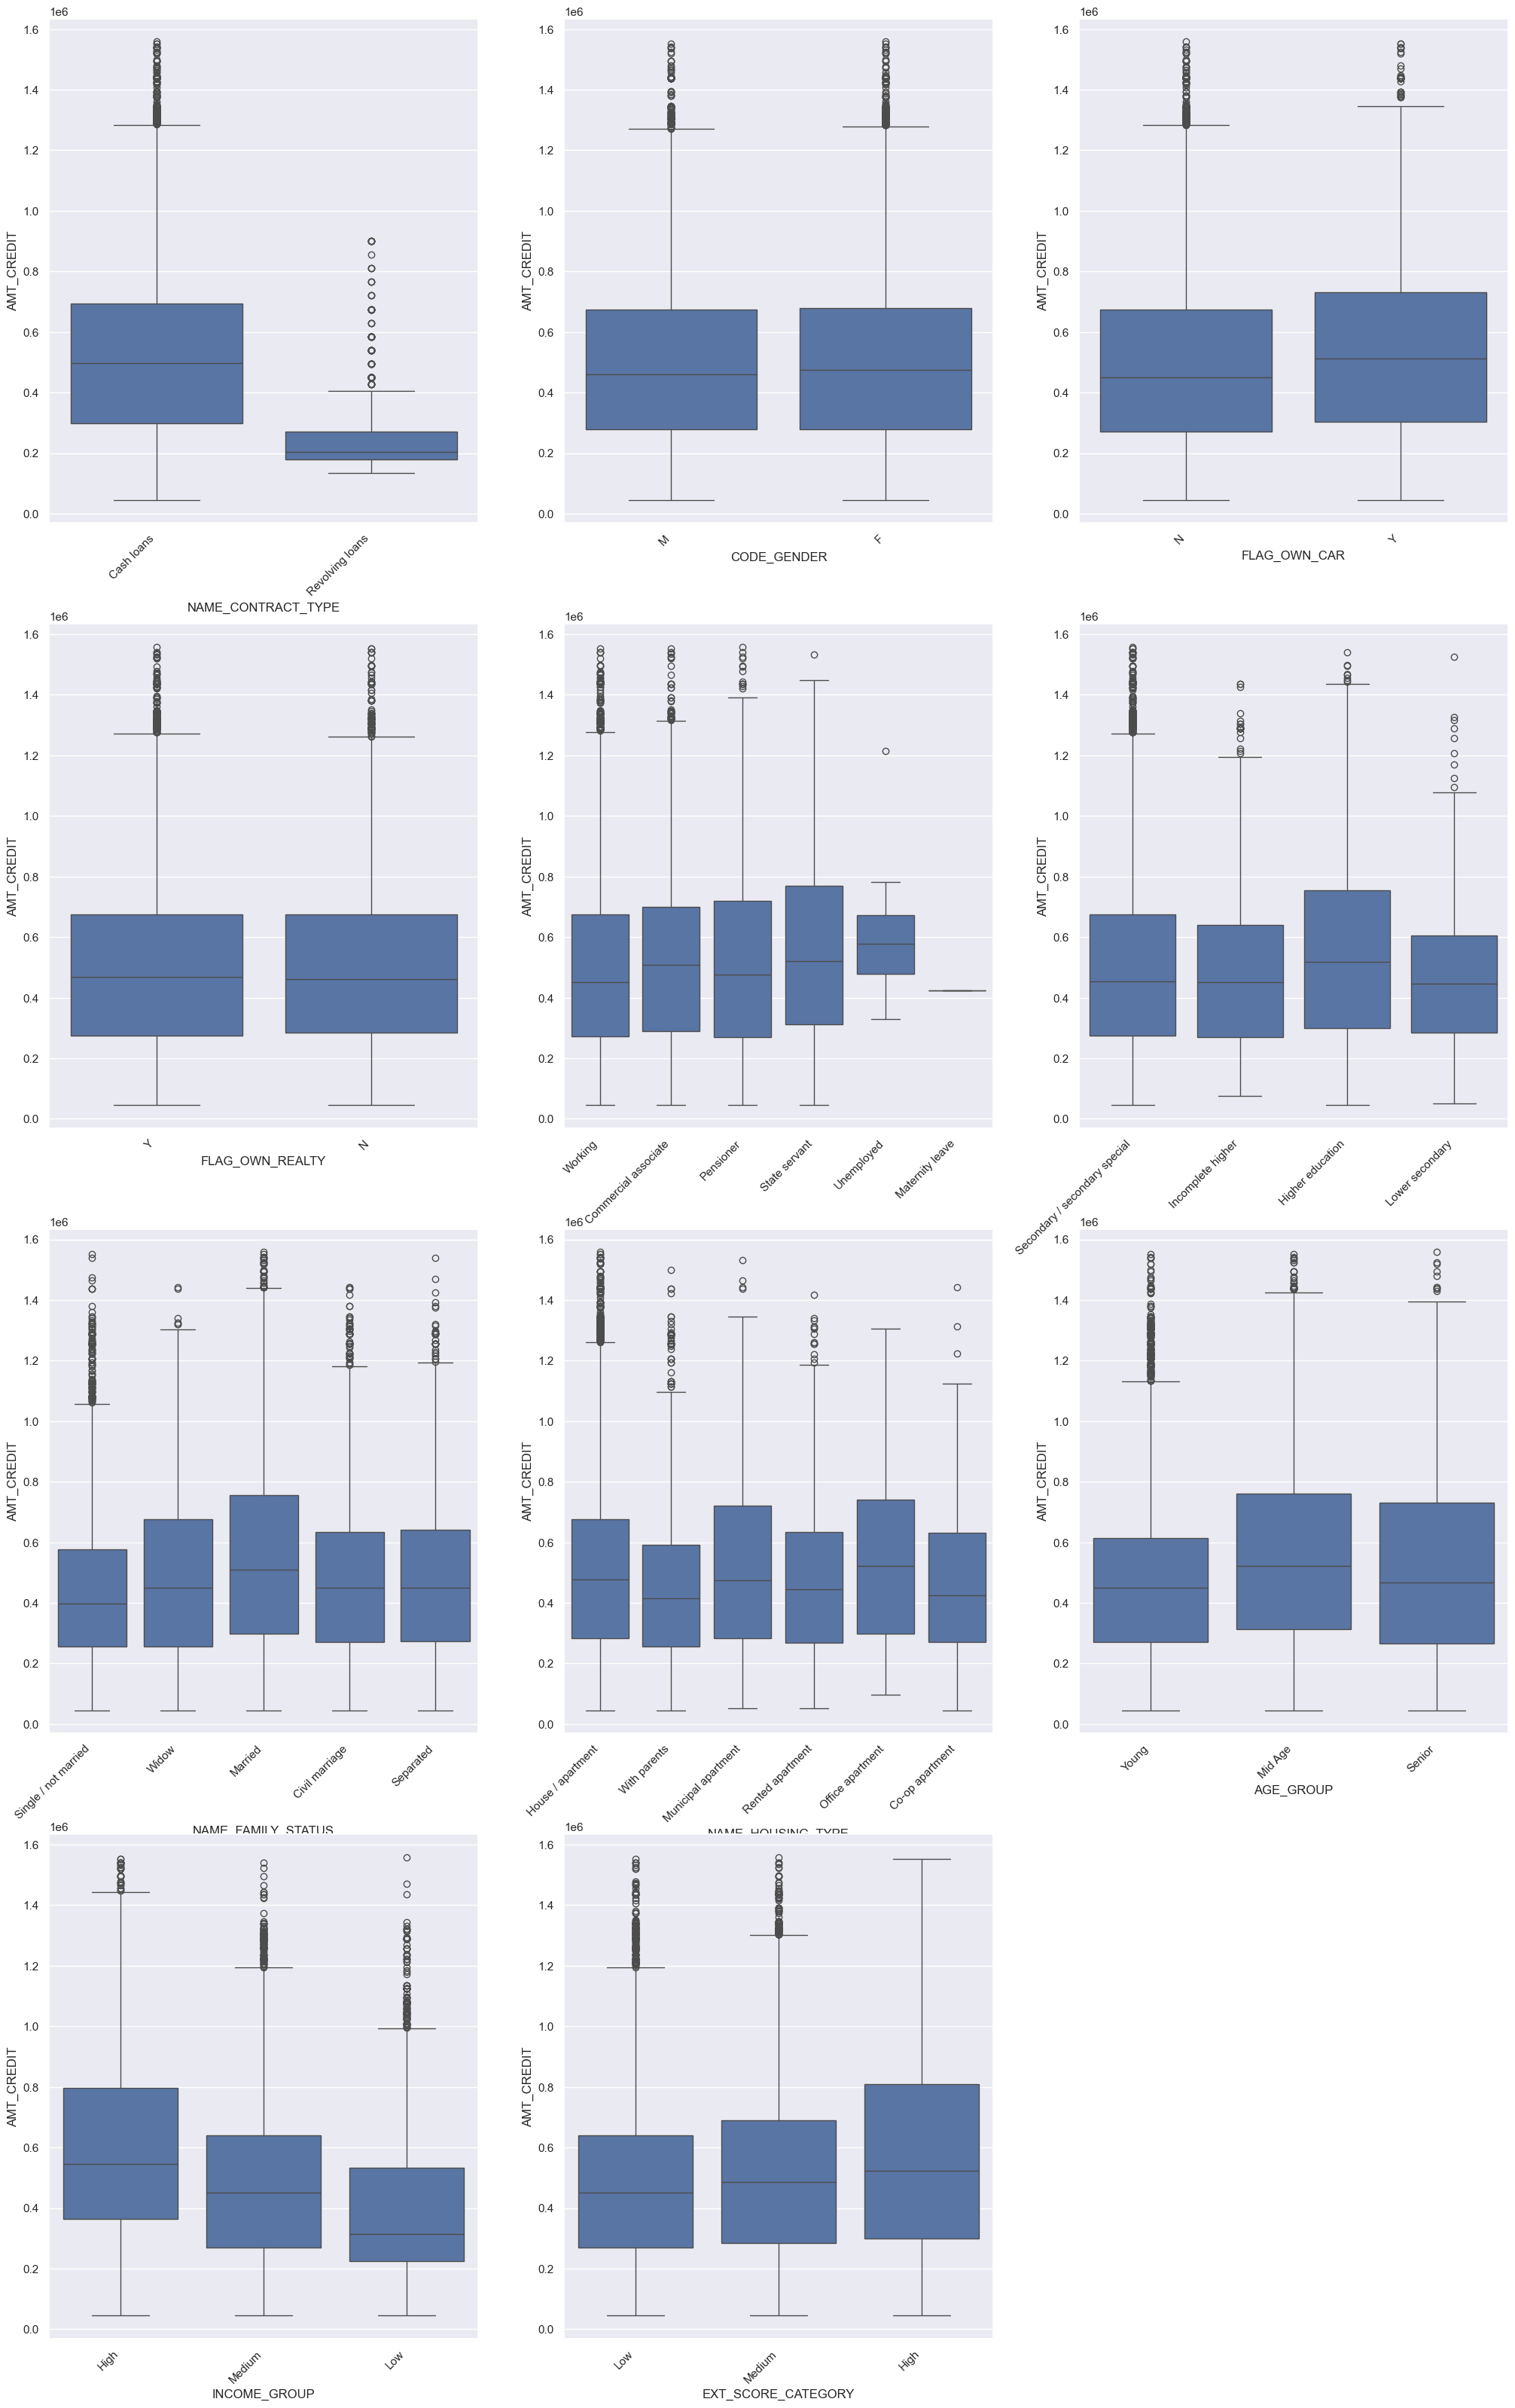

In [150]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_1)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The Young age group got less amount of loan credited cmpared to mid age and senior citizen.
4. Higher income group have more loan amount credited.
5. Clients having higher external score have more loan amount.

#### Non-defaulters

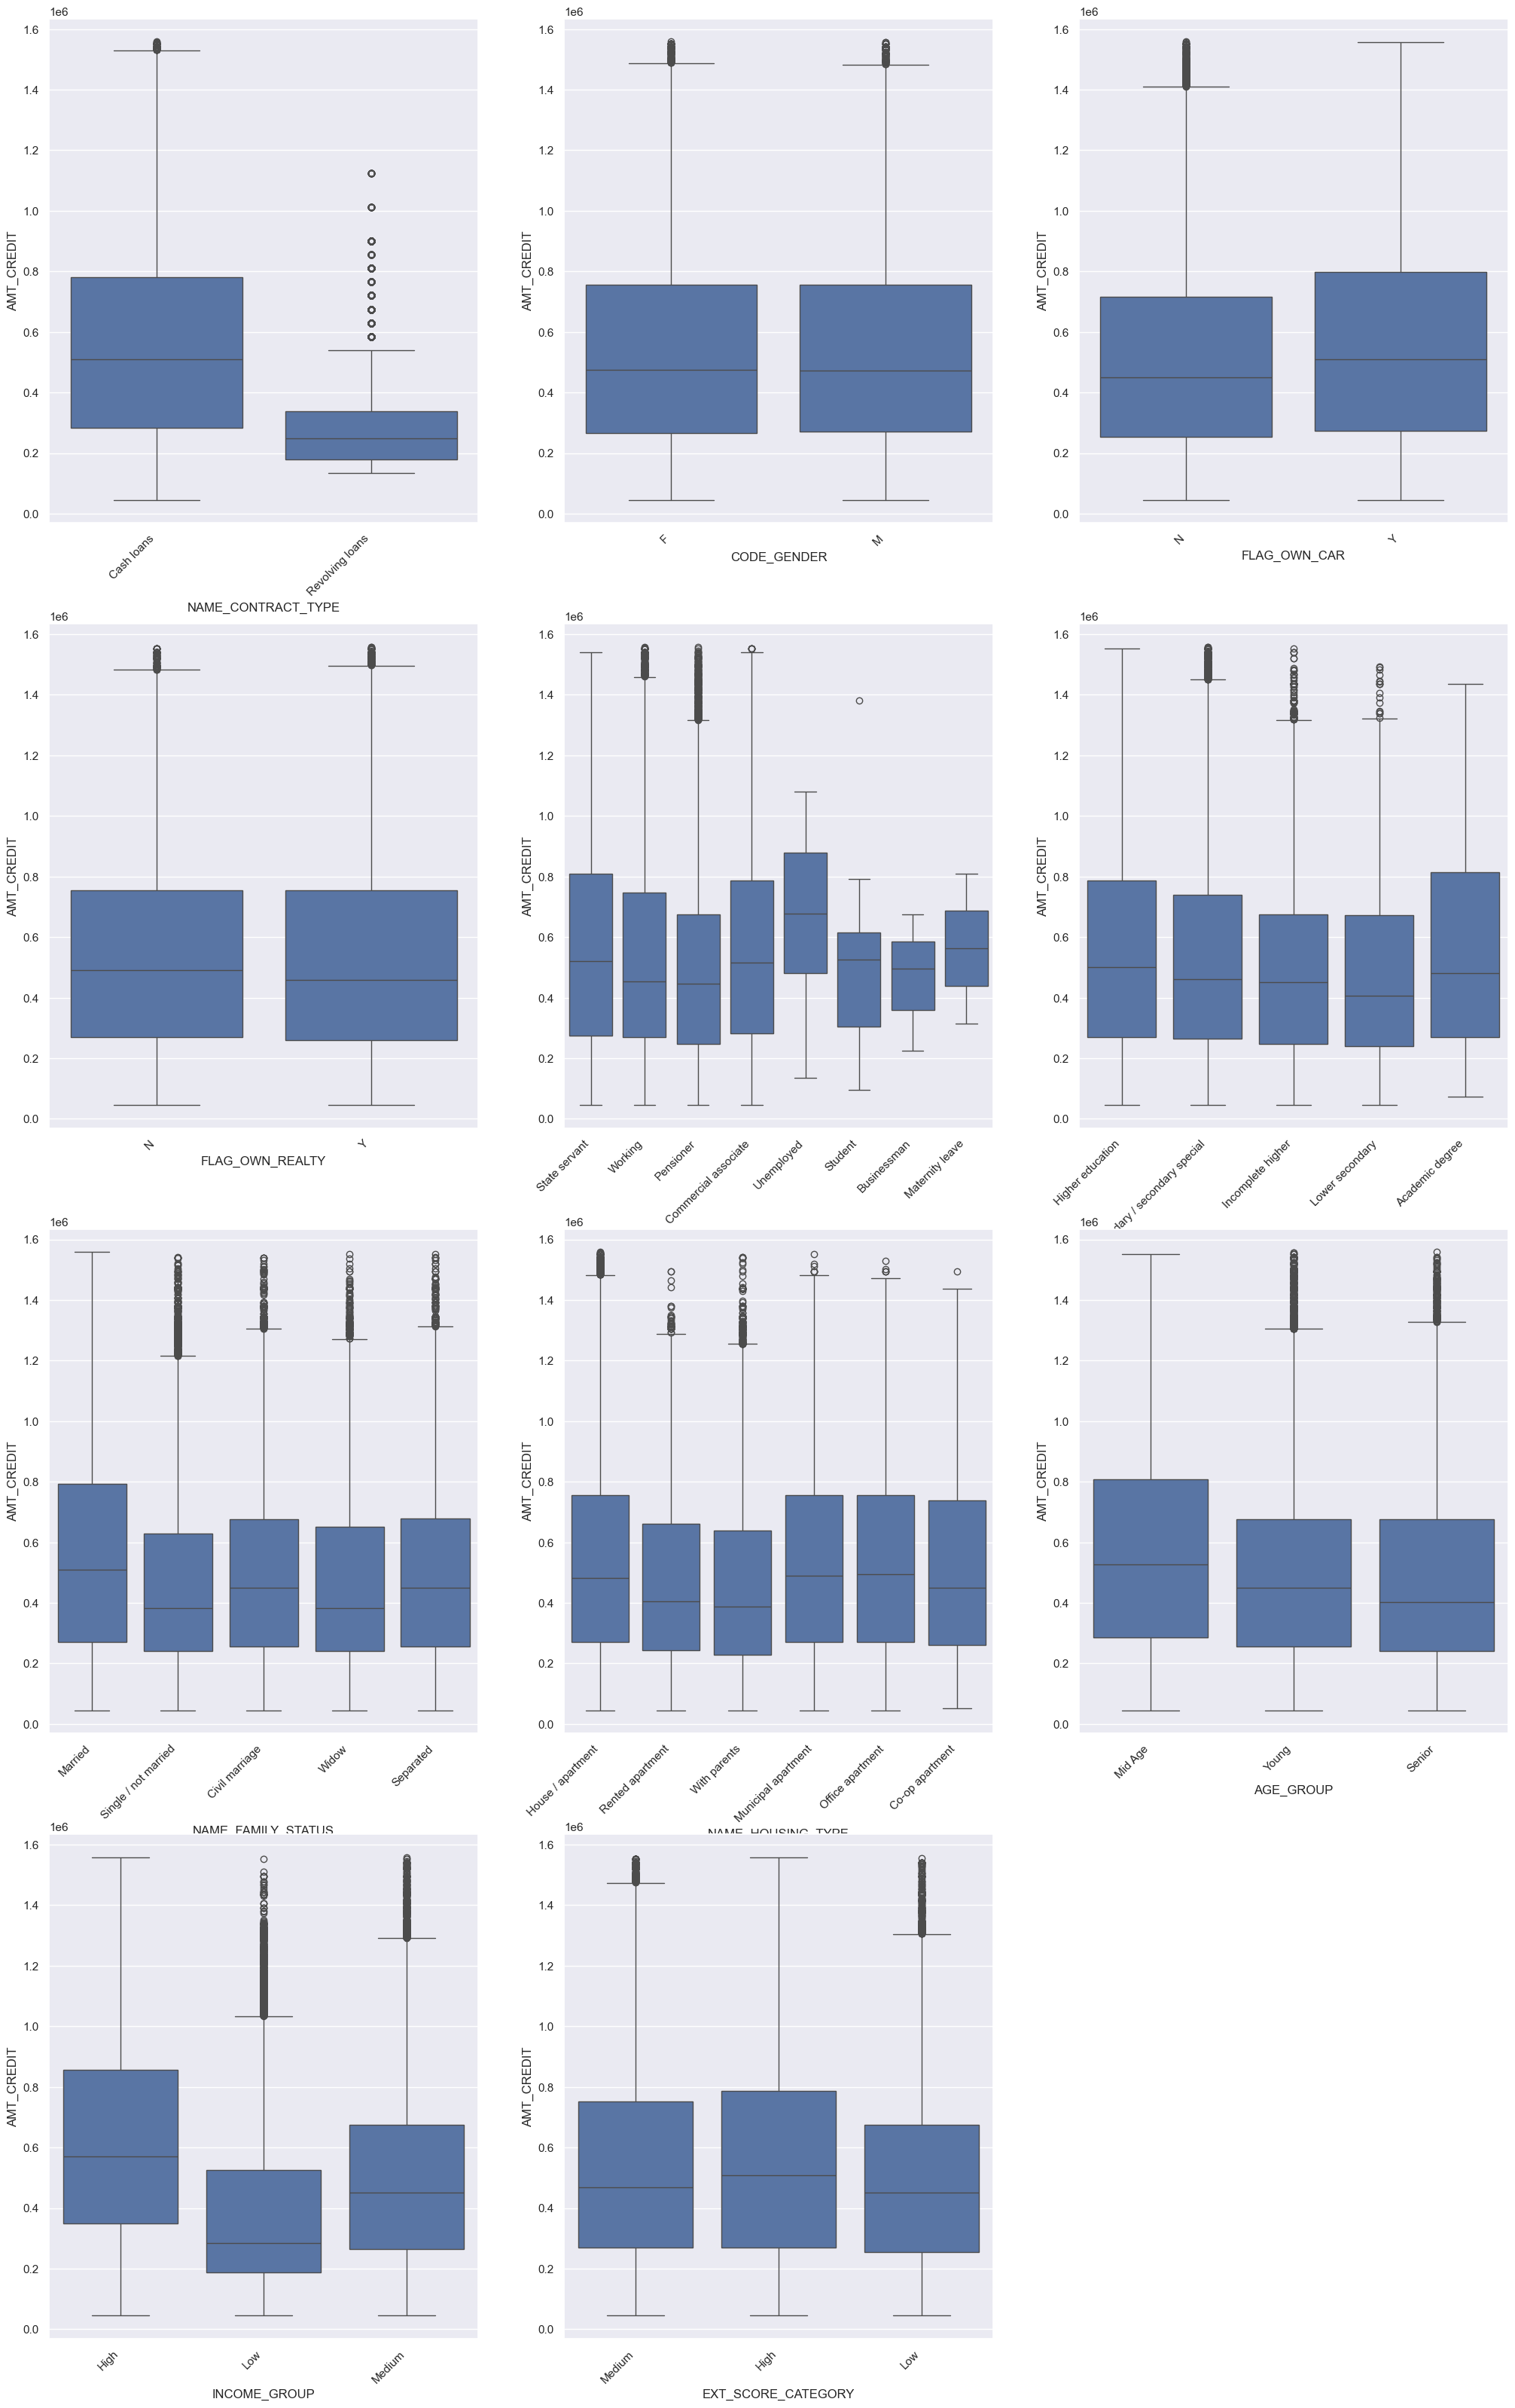

In [153]:
plt.figure(figsize=(25,40))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_current_target_0)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Analysis
1. Credit amount of the loans are very low for `Revolving loans`
2. There is no credit amount differnce between genders, client owning cars or realty.
3. The mid age group got more amount of loan credited cmpared to young and senior citizen.
4. Higher income group have more loan amount credited and lower the lowest.
5. Clients having higher external score have more loan amount.
6. Surprisingly the `unemployed` people have spike in credit amount of loan
7. The `Married` people have more loan amount credited.

### Anslysis of two segmented variables 

 #### Income group and gender

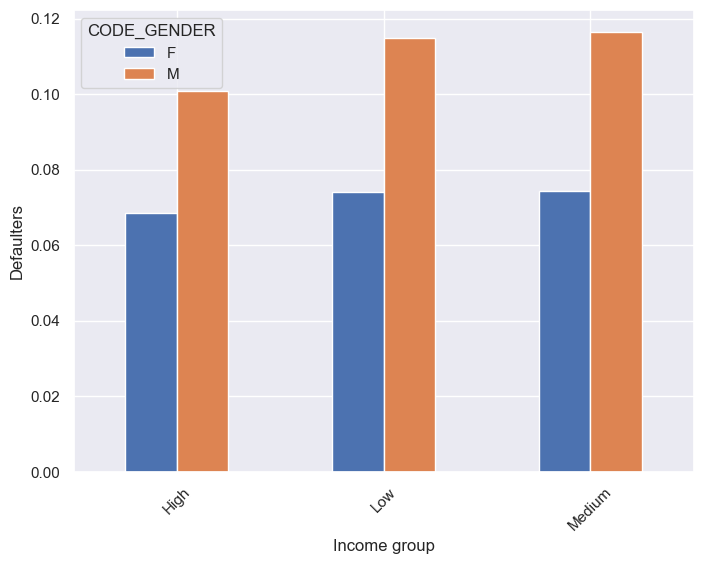

In [157]:
df_app.pivot_table(values='TARGET',index='INCOME_GROUP',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Income group')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
We can see that `Males` are more likely defaulted than `Females` accross all income groups.

#### Education and gender

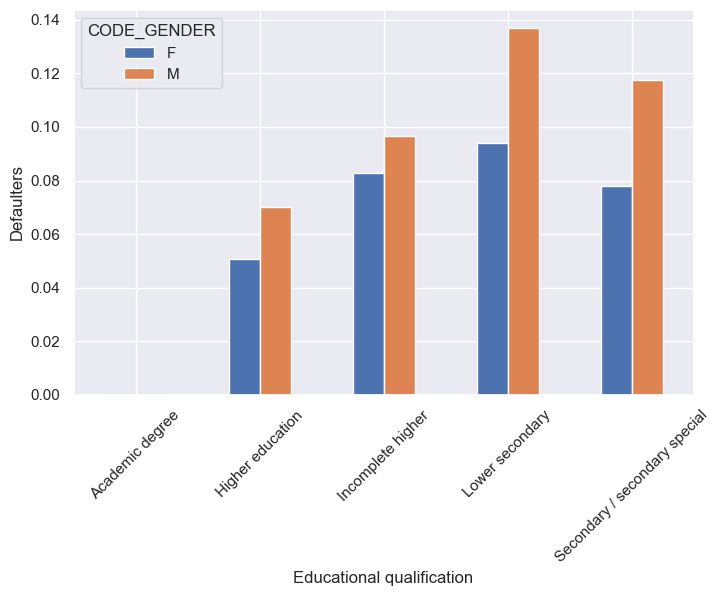

In [160]:
df_app.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
1. `Lower secondary` educated clients are more defaulted followed by `Secondary` and `Incomplete higher` educated clients.
2. The `Higher` educated people are less defaulted.
3. Accross all educated level `Females` are less defaulted than male.

 #### Credit amount group and Income group

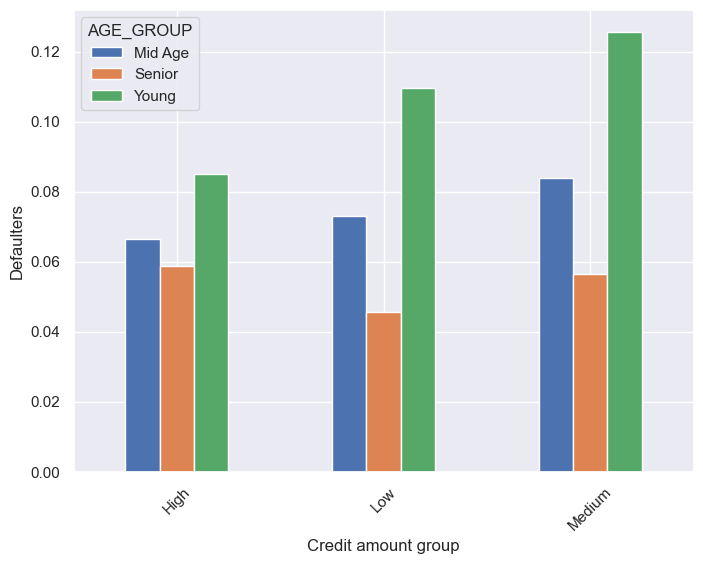

In [163]:
df_app.pivot_table(values='TARGET',index='CREDIT_GROUP',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Credit amount group')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
1. Young clients with medium and low credit amount group are highly defaulted.
2. Senior citizens across all credit amount groups are less likely defaulted.

#### Age group and Income group

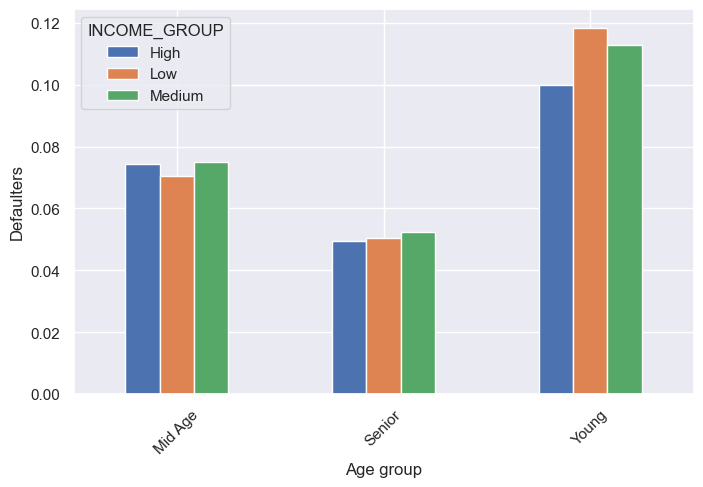

In [166]:
df_app.pivot_table(values='TARGET',index='AGE_GROUP',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Age group')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
1. `Young` clients are more defaulted than Mid age and senior.
2. Young low income people are more defaulted.
3. For Mid age and senior people the default rate is almost same in all income group.

#### Profession and Gender

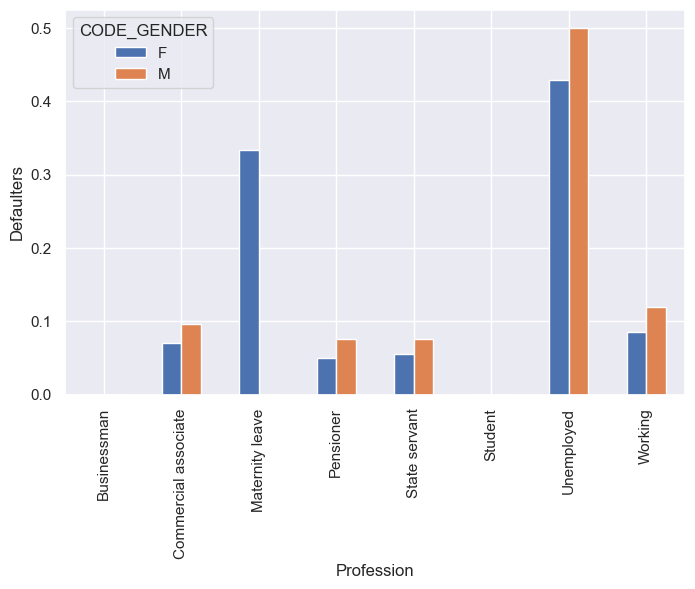

In [169]:
df_app.pivot_table(values='TARGET',index='NAME_INCOME_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=90)
plt.xlabel('Profession')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
1. No surprise the unemployed clients are more defaulted.
2. Clients with maternity leave are expected to be defaulted more.
3. The default rate is lesser in all other professions.
4. Males are more defaulted with their respective professions compared to females.

#### Family status and age group

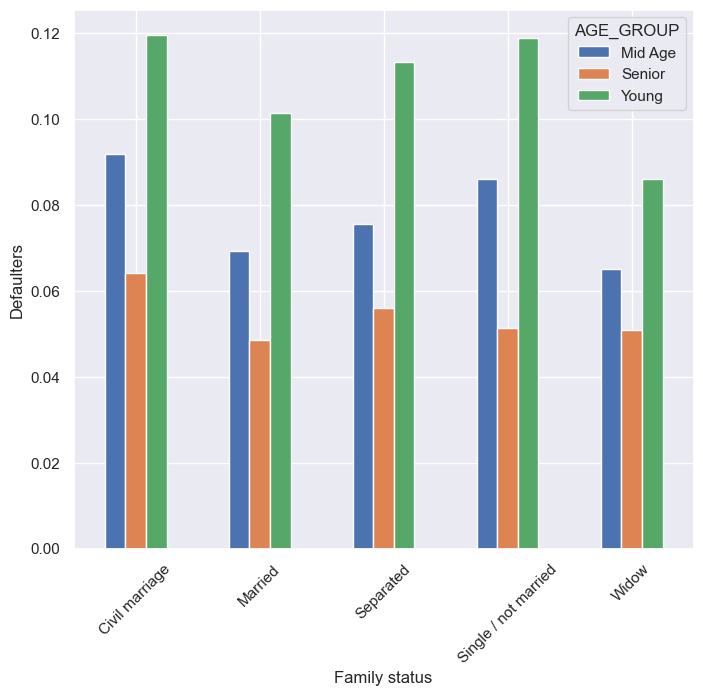

In [172]:
df_app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
Across all family status the `Young` clients are more defaulted and `Senior citizen` are less.

#### Family status and gender

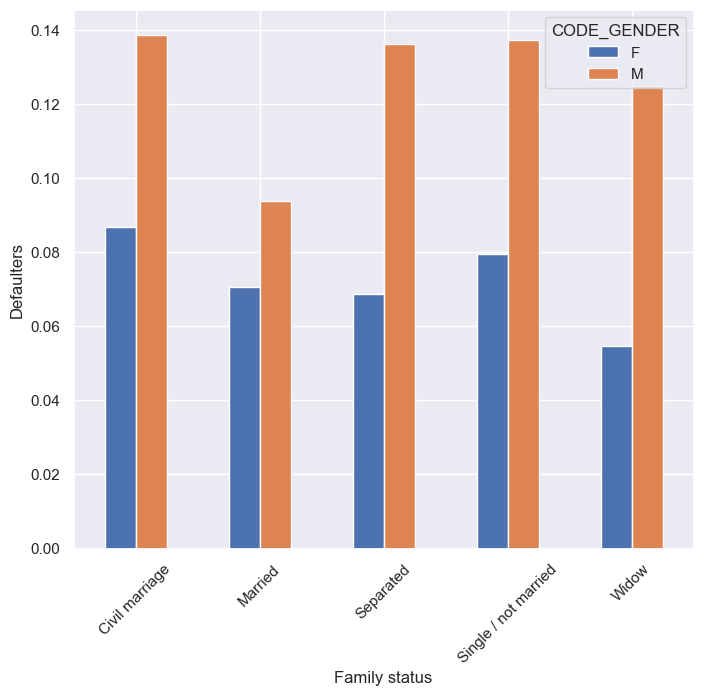

In [175]:
df_app.pivot_table(values='TARGET',index='NAME_FAMILY_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,7),rot=45)
plt.xlabel('Family status')
plt.ylabel('Defaulters')
plt.show()

##### Analysis
Across all family status the `Male` clients are more defaulted than `Female`.

# Reading 'Previous application' dataset for further analysis

In [178]:
df_application_previous = pd.read_csv('previous_application.csv')
df_application_previous.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [179]:
df_application_previous.shape

(1670214, 37)

In [180]:
df_application_previous.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Handaling missing values in columns

**Replacing all the XNA and XAP to np.null**
Because looks like these values entered in the application as blank or may be not applicable.

In [183]:
df_application_previous.replace('XNA',np.nan,inplace=True)
df_application_previous.replace('XAP',np.nan,inplace=True)

In [184]:
# List the columns having more than 30% missing values
cols_30_percent_missing_values = (df_application_previous.columns[(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)), 2)) >= 30]).tolist()
cols_30_percent_missing_values

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [185]:
# Delete the columns having more than 30% missing values
df_application_previous = df_application_previous.drop(cols_30_percent_missing_values,axis=1)

##### List and delete the columns, which are not much relevant for the analysis

In [187]:
df_application_previous.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_CLIENT_TYPE',
       'NAME_PORTFOLIO', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'CNT_PAYMENT',
       'PRODUCT_COMBINATION'],
      dtype='object')

In [188]:
cols_irrelevant = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [189]:
# Delete the columns which are irrelevant for the analysis
df_application_previous = df_application_previous.drop(cols_irrelevant,axis=1)

In [190]:
df_application_previous.shape

(1670214, 15)

#### Treating Missing Values in Rows

In [192]:
# Count the number of rows having more than 50% missing values
# As there are none of the rows, so we are not deleting rows on basis of this
len(df_application_previous[df_application_previous.isnull().sum(axis=1) > (len(df_application_previous.columns)//2)].index)

0

In [193]:
# Percent of missing values in columns
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV               0.00
SK_ID_CURR               0.00
NAME_CONTRACT_TYPE       0.02
AMT_ANNUITY             22.29
AMT_APPLICATION          0.00
AMT_CREDIT               0.00
AMT_GOODS_PRICE         23.08
NAME_CONTRACT_STATUS     0.00
DAYS_DECISION            0.00
NAME_CLIENT_TYPE         0.12
NAME_PORTFOLIO          22.29
CHANNEL_TYPE             0.00
SELLERPLACE_AREA         0.00
CNT_PAYMENT             22.29
PRODUCT_COMBINATION      0.02
dtype: float64

In [194]:
# Count the rows for which AMT_ANNUITY, AMT_GOODS_PRICE and CNT_PAYMENT all are empty
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['CNT_PAYMENT']) & np.isnan(df_application_previous['AMT_GOODS_PRICE'])])

333855

As there are only 333855 such records we can delete those.
Note:- As we have total 1670214 records deleting only 333855 records will not much affect our further analysis.
It is better to delete such rows instead of imputing values and making the analysis biased.

In [196]:
df_application_previous = df_application_previous[(~(np.isnan(df_application_previous['AMT_ANNUITY']) & np.isnan(df_application_previous['AMT_GOODS_PRICE']) & np.isnan(df_application_previous['CNT_PAYMENT'])))]

In [197]:
df_application_previous.shape

(1336359, 15)

In [198]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             2.87
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.87
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          2.87
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             2.87
PRODUCT_COMBINATION     0.00
dtype: float64

In [199]:
# Count the rows for which AMT_ANNUITY is empty
len(df_application_previous[np.isnan(df_application_previous['AMT_ANNUITY'])])

38380

In [200]:
# As there are only 38380 rows we can delte those records
df_application_previous = df_application_previous[~(np.isnan(df_application_previous['AMT_ANNUITY']))]

In [201]:
df_application_previous.shape

(1297979, 15)

In [202]:
(round(100*(df_application_previous.isnull().sum()/len(df_application_previous.index)),2))

SK_ID_PREV              0.00
SK_ID_CURR              0.00
NAME_CONTRACT_TYPE      0.00
AMT_ANNUITY             0.00
AMT_APPLICATION         0.00
AMT_CREDIT              0.00
AMT_GOODS_PRICE         3.98
NAME_CONTRACT_STATUS    0.00
DAYS_DECISION           0.00
NAME_CLIENT_TYPE        0.07
NAME_PORTFOLIO          0.00
CHANNEL_TYPE            0.00
SELLERPLACE_AREA        0.00
CNT_PAYMENT             0.00
PRODUCT_COMBINATION     0.00
dtype: float64

In [203]:
df_application_previous.shape

(1297979, 15)

### Removing outliers

In [205]:
# Finding outliers in all the numerical columns with 1.5 IQR rule and removing the outlier records 
col_list_outlier = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','CNT_PAYMENT']
for col in col_list_outlier: 
    q1 = df_application_previous[col].quantile(0.25)
    q3 = df_application_previous[col].quantile(0.75)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    df_application_prev = df_application_previous.loc[(df_application_previous[col] > range_low) & (df_application_previous[col] < range_high)]

df_application_prev.shape

(1242076, 15)

In [206]:
# Percentage of rows lost
round((100 - 100*(len(df_application_prev.index)/1670214)),2)

25.63

In our data cleaning excerise we have lost around `25%` rows. As this is huge dataset, we still have 1242076 records for analysis.

### Checking data imbalance

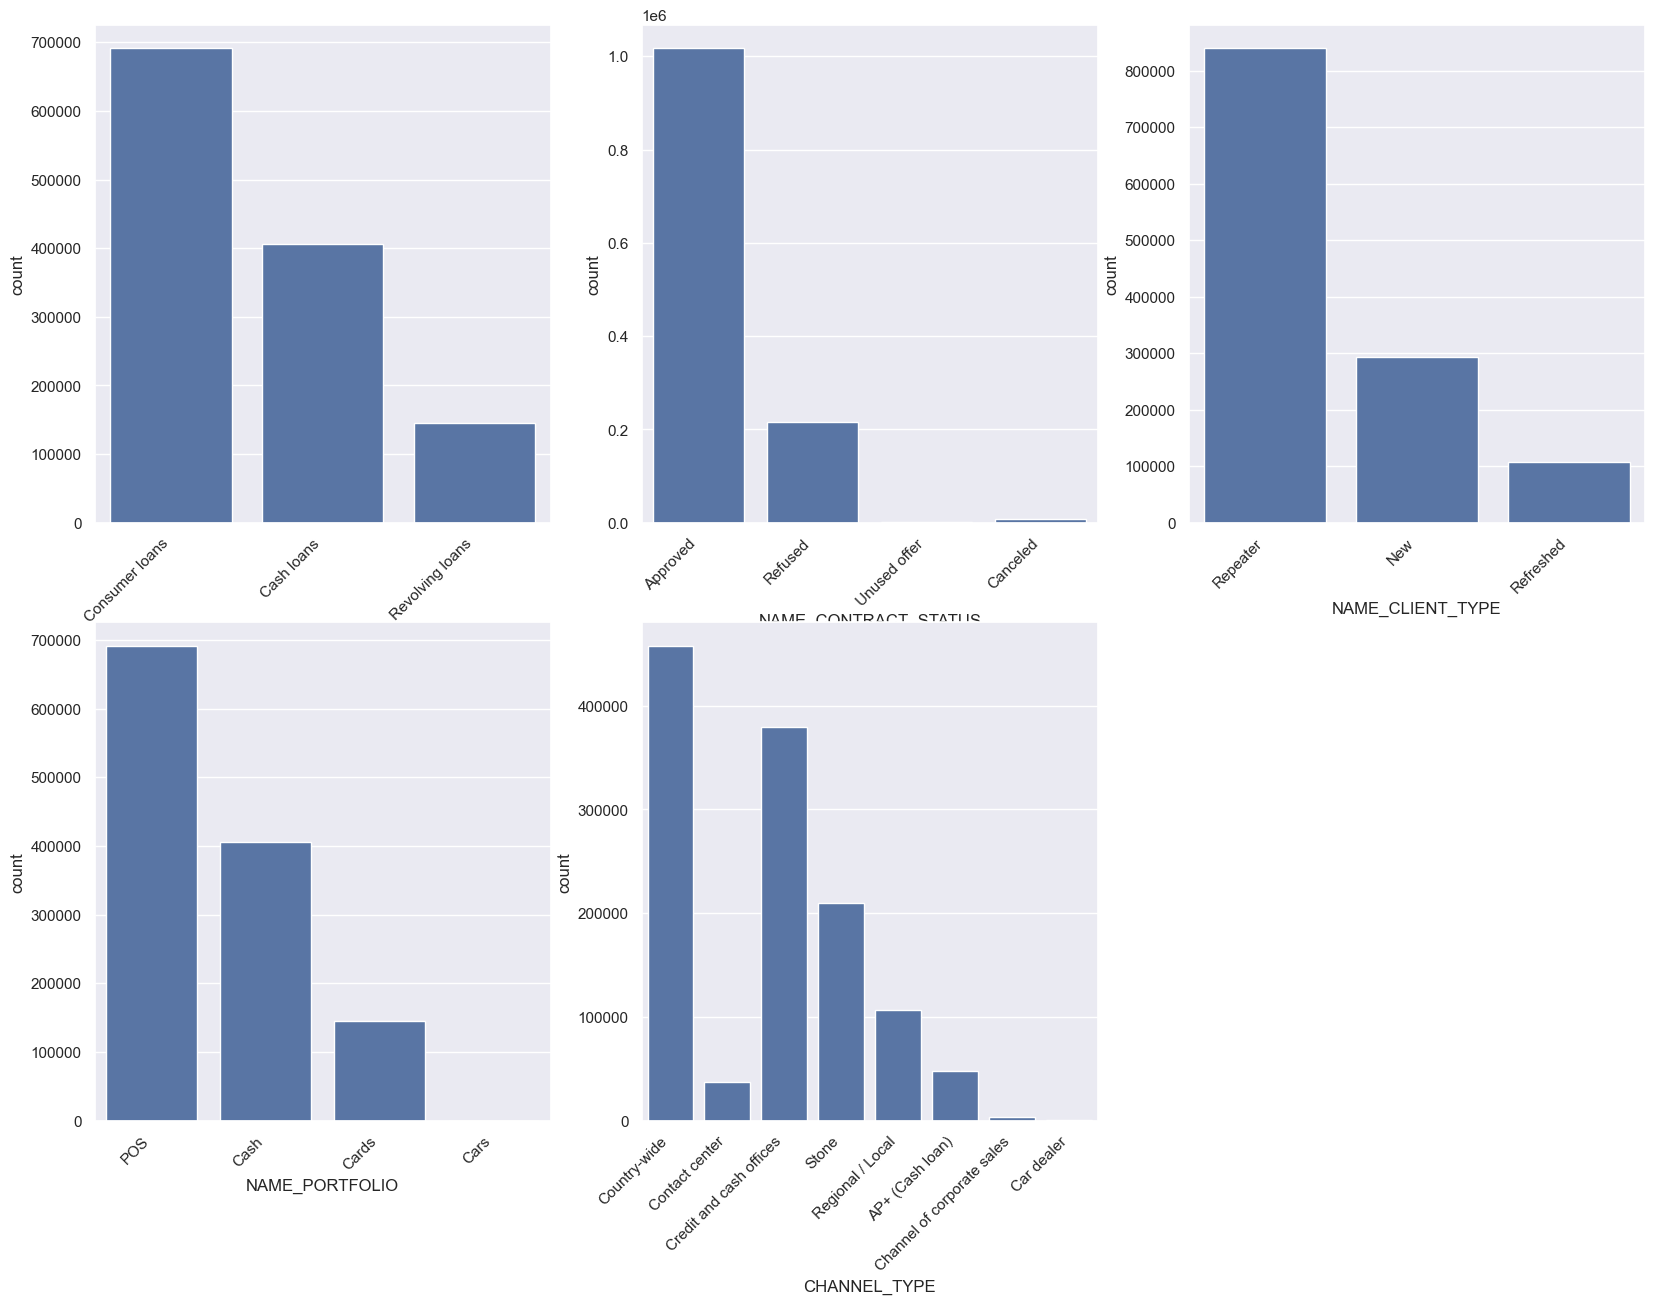

In [209]:
# Listing columns for check data imbalance and plotting them
col_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']            
k=0
plt.figure(figsize=(20,22))
for col in col_list:    
    k=k+1
    plt.subplot(3, 3,k)    
    ax = sns.countplot(x = col , data = df_application_prev )
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

We can see that there is data imbalance in below columns:-
1. NAME_CONTRACT_TYPE - There are veru few `Revolving Loans`
2. NAME_CONTRACT_STATUS - There are very few `Refused` loans. Almost negligible `Canceled` loans.
3. NAME_CLIENT_TYPE - There are very few `New` applicant. Even fewer `Refreshed` applicants.
4. NAME_PORTFOLIO - Very few application for Cards and Cars
5. CHANNEL_TYPE - Except `Country-Wide`, `Credit and Cash offices` and `Stone` all other channels are very few in muber.

#### Converting `DAYS_DECISION` column into `MONTH_DECISION` column for readablity and analysis

In [212]:
# Divide 'DAYS_DECISION' by 30 for taking MONTH_DECISION
df_application_prev['MONTH_DECISION'] = abs(df_application_prev['DAYS_DECISION']//30)

In [213]:
# Drop 'DAYS_DECISION' column
df_application_prev = df_application_prev.drop(['DAYS_DECISION'],axis=1)

In [214]:
df_application_prev.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE NAME_CONTRACT_STATUS NAME_CLIENT_TYPE  \
0     17145.0          17145.0             Approved         Repeater   
1    679671.0         607500.0             Approved         Repeater   
2    136444.5         112500.0             Approved         Repeater   
3    470790.0         450000.0             Approved         Repeater   
4    404055.0         337500.0              Refused         Repeater   

  NAME_PORTFOLIO             CHANNEL_TYPE  SELLERPLACE_AREA  CNT_PAYMENT  \
0            POS             Country-wide                35         12.0   
1           Cash           Contact center                -1         36.0   
2           Cash  Credit and cash offices                -1         12.0   
3           Cash  Credit and cash offices                -1         12.0   
4           Cash  Credit and cash offices                -1         24.0   

        PRODUCT_COMBINATION  MONTH_DECISION  
0  POS mobile with interest               3  
1          Cash X-Sell: low               6  
2         Cash X-Sell: high              11  
3       Cash X-Sell: middle              18  
4         Cash Street: high              27

In [215]:
df_application_prev.shape

(1242076, 15)

### Merging Current application and Previous application dataset

In [217]:
# Columns to take from current application dataset
cols_current = ['SK_ID_CURR','TARGET','CODE_GENDER','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','AGE_GROUP','INCOME_GROUP','EXT_SCORE_CATEGORY']

In [218]:
# Creating a dataset from current application for merging 
df_current_to_merge = df_app[cols_current]
df_current_to_merge.head()

SK_ID_CURR  TARGET CODE_GENDER            NAME_EDUCATION_TYPE  \
0      100002       1           M  Secondary / secondary special   
1      100003       0           F               Higher education   
2      100004       0           M  Secondary / secondary special   
3      100006       0           F  Secondary / secondary special   
4      100007       0           M  Secondary / secondary special   

     NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP EXT_SCORE_CATEGORY  
0  Single / not married     Young         High                Low  
1               Married   Mid Age         High             Medium  
2  Single / not married   Mid Age          Low               High  
3        Civil marriage   Mid Age       Medium             Medium  
4  Single / not married   Mid Age       Medium             Medium

In [219]:
# Columns to remove from previous application dataset
cols_prev_to_drop = ['SELLERPLACE_AREA','PRODUCT_COMBINATION','AMT_GOODS_PRICE']

In [220]:
# Creating  a dataset from previous application for merging
df_prev_to_merge = df_application_prev.drop(cols_prev_to_drop,axis=1)
df_prev_to_merge.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
3    470790.0             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  
0             Country-wide         12.0               3  
1           Contact center         36.0               6  
2  Credit and cash offices         12.0              11  
3  Credit and cash offices         12.0              18  
4  Credit and cash offices         24.0              27

In [221]:
# Merging both the datasets
df_merged = pd.merge(df_prev_to_merge,df_current_to_merge, on='SK_ID_CURR', how='left')
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
3    470790.0             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3     0.0           F   
1           Contact center         36.0               6     0.0           F   
2  Credit and cash offices         12.0              11     0.0           F   
3  Credit and cash offices         12.0              18     NaN         NaN   
4  Credit and cash offices         24.0              27     0.0           F   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special     Civil marriage   Mid Age          Low   
2  Secondary / secondary special            Married     Young          Low   
3                            NaN                NaN       NaN          NaN   
4  Secondary / secondary special            Married     Young         High   

  EXT_SCORE_CATEGORY  
0               High  
1             Medium  
2                Low  
3                NaN  
4             Medium

In [222]:
df_merged.shape

(1242076, 19)

In [223]:
len(df_merged[np.isnan(df_merged['TARGET'])])

286969

We can see that there are NaN values in the current application columns in the merged datasets. Because few `SK_ID_CURR` are present in the previous application dataset, but those IDs are not present in the current application dataset.
Eg:- `SK_ID_CURR == 176158` is present in the previous application but not in present.
We will remove those such records.

In [225]:
df_merged = df_merged[(~(np.isnan(df_merged['TARGET'])))]         

In [226]:
# Converting TARGET column from float64 to Int64
df_merged['TARGET'] = df_merged['TARGET'].astype('int64')

In [227]:
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   
5    340573.5             Approved         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
4  Credit and cash offices         24.0              27       0           F   
5  Credit and cash offices         18.0              23       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special     Civil marriage   Mid Age          Low   
2  Secondary / secondary special            Married     Young          Low   
4  Secondary / secondary special            Married     Young         High   
5  Secondary / secondary special     Civil marriage   Mid Age         High   

  EXT_SCORE_CATEGORY  
0               High  
1             Medium  
2                Low  
4             Medium  
5             Medium

We can create a new derived column for what percentage of the applied amount was credited for each client. 
Derived column name :- `PERCENT_CREDIT`

In [229]:
df_merged['PERCENT_CREDIT'] = round(((df_merged['AMT_CREDIT']/df_merged['AMT_APPLICATION'])*100),2)
df_merged.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT NAME_CONTRACT_STATUS NAME_CLIENT_TYPE NAME_PORTFOLIO  \
0     17145.0             Approved         Repeater            POS   
1    679671.0             Approved         Repeater           Cash   
2    136444.5             Approved         Repeater           Cash   
4    404055.0              Refused         Repeater           Cash   
5    340573.5             Approved         Repeater           Cash   

              CHANNEL_TYPE  CNT_PAYMENT  MONTH_DECISION  TARGET CODE_GENDER  \
0             Country-wide         12.0               3       0           F   
1           Contact center         36.0               6       0           F   
2  Credit and cash offices         12.0              11       0           F   
4  Credit and cash offices         24.0              27       0           F   
5  Credit and cash offices         18.0              23       0           M   

             NAME_EDUCATION_TYPE NAME_FAMILY_STATUS AGE_GROUP INCOME_GROUP  \
0              Incomplete higher            Married   Mid Age         High   
1  Secondary / secondary special     Civil marriage   Mid Age          Low   
2  Secondary / secondary special            Married     Young          Low   
4  Secondary / secondary special            Married     Young         High   
5  Secondary / secondary special     Civil marriage   Mid Age         High   

  EXT_SCORE_CATEGORY  PERCENT_CREDIT  
0               High          100.00  
1             Medium          111.88  
2                Low          121.28  
4             Medium          119.72  
5             Medium          108.12

### Univariate analysis on unordered categorical variable

#### Previous Loan status

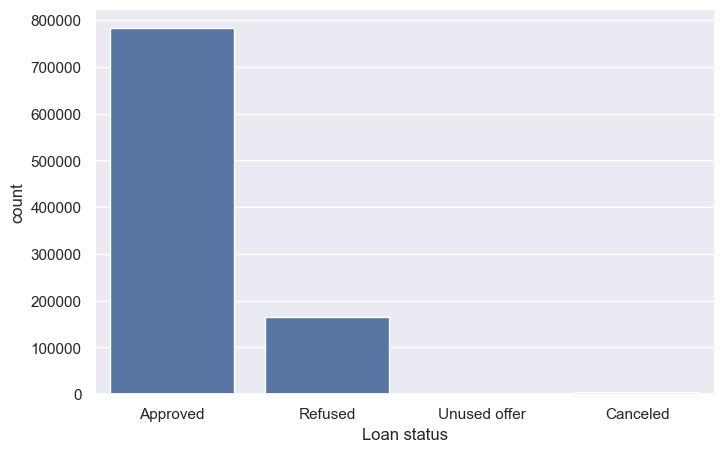

In [232]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CONTRACT_STATUS',data=df_merged)
ax.set(xlabel='Loan status')
plt.show()

##### Analysis
There are huge number of `Approved` loan than `Refused`. Hardly, there are any `Canceled` or `Unused offer` loan.

#### Client type

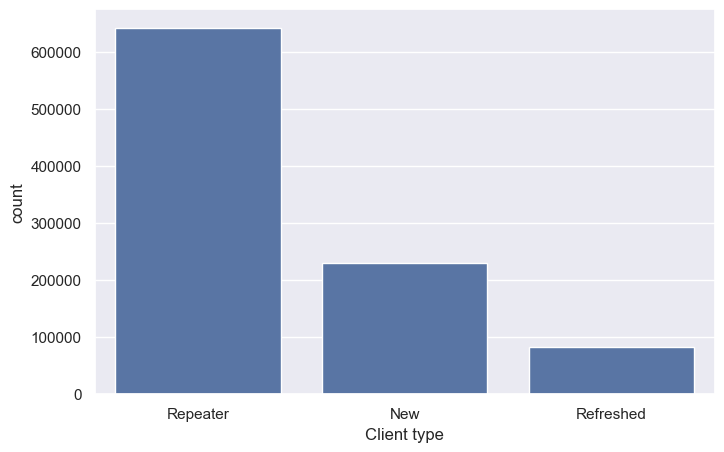

In [235]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_CLIENT_TYPE',data=df_merged)
ax.set(xlabel='Client type')
plt.show()

##### Analysis
Mostly the applicants were `Repeater`

#### Portfolio of the previous applications

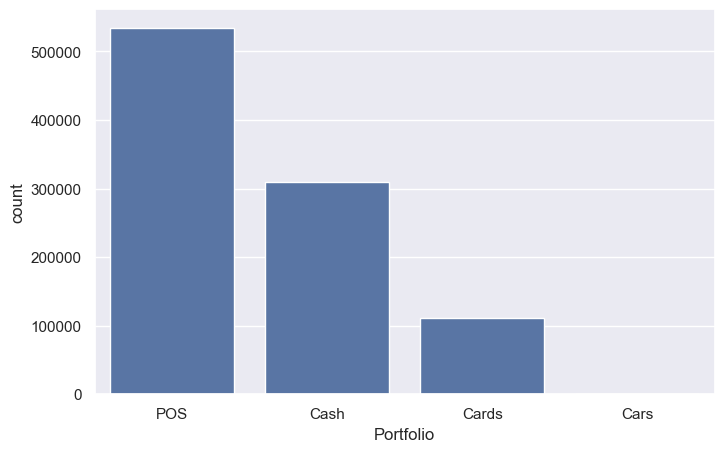

In [238]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'NAME_PORTFOLIO',data=df_merged)
ax.set(xlabel='Portfolio')
plt.show()

##### Analysis
The highest number of the previous applications was for POS. Applications for Cash also has good number. Applications for Cards were very few.

#### Application channel type

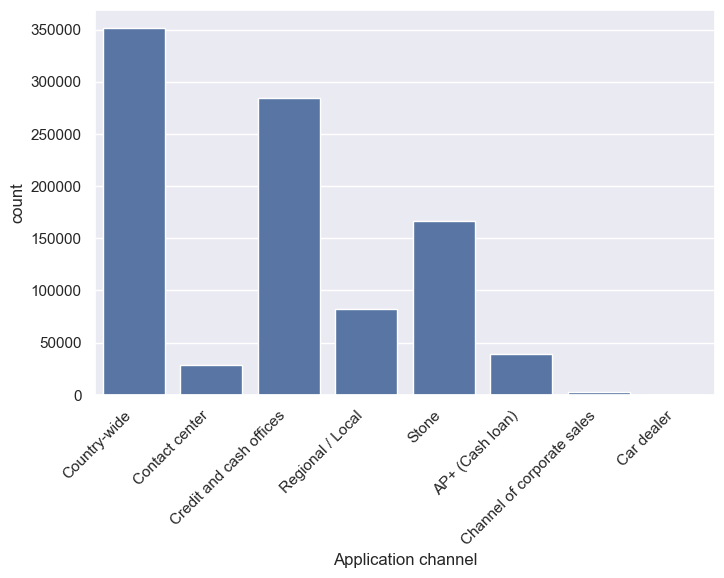

In [241]:
plt.figure(figsize=(8,5))   
ax = sns.countplot(x = 'CHANNEL_TYPE',data=df_merged)
temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
ax.set(xlabel='Application channel')
plt.show()

##### Analysis
We see that `Country-wide` was heavily used for previous applications followed by `Credit and Cash offices`, `Stone` and `Regional`. Rest other channels are hardly used. 

### Univariate analysis for continious variables

#### Applied loan amount

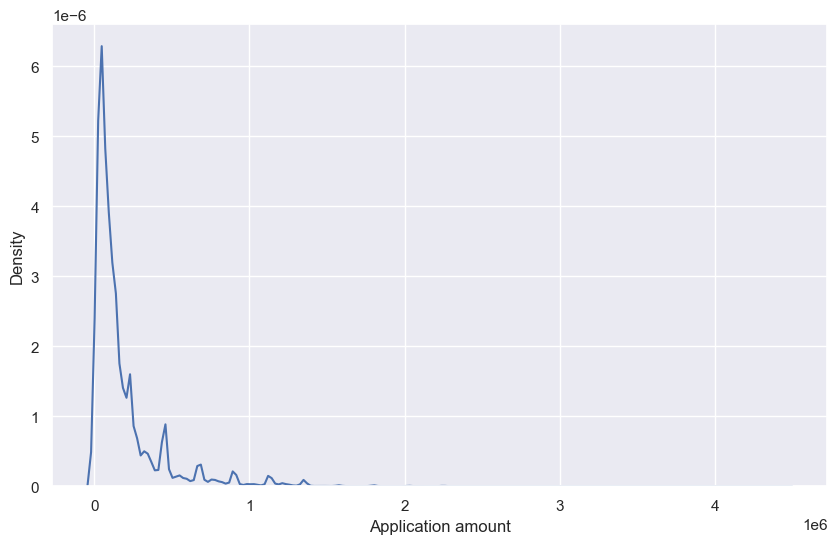

In [245]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_APPLICATION'],hist=False)
ax.set(xlabel='Application amount')
plt.show()

##### Analysis
Most of the applications were for the amount of below 250000 as we see from the above distribution.

#### Credited loan amount

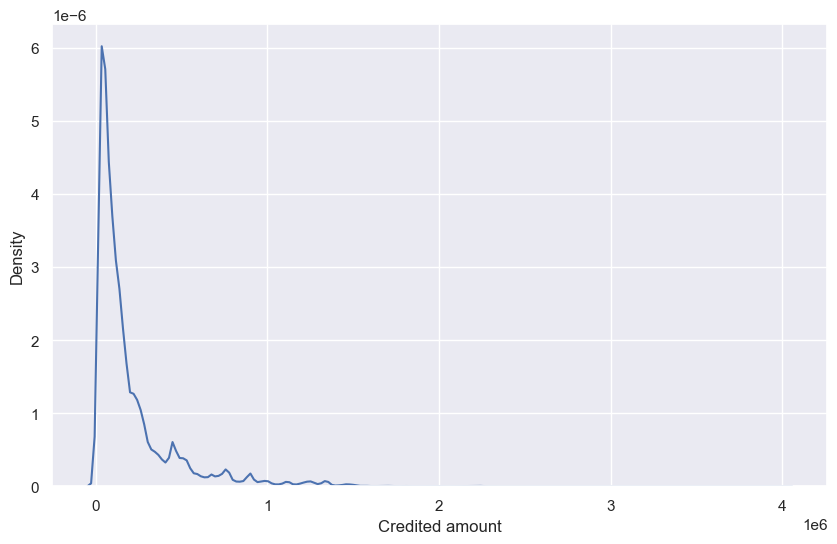

In [248]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['AMT_CREDIT'],hist=False)
ax.set(xlabel='Credited amount')
plt.show()

##### Analysis
The distribution of the credited amount of the loan was mostly in 250000 range.

#### Months took for the pervious application decision relative to the current application 

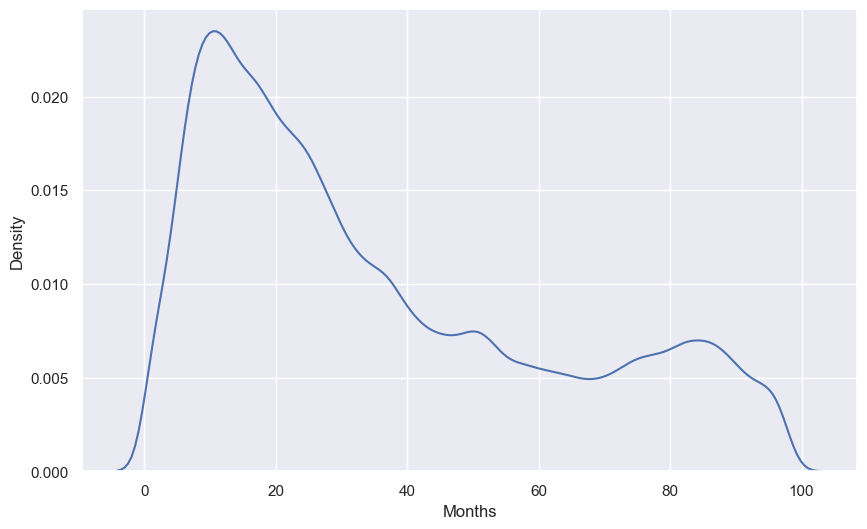

In [251]:
plt.figure(figsize=(10,6))
ax = sns.distplot(df_merged['MONTH_DECISION'],hist=False)
ax.set(xlabel='Months')
plt.show()

##### Analysis
We can see that most of the applications decision took approximately 30 months. The time taken spread upto 100 months.

## Bivariate analysis

#### Corelation of relevant numerical columns

In [255]:
# Listing the relevant columns for finding corelation
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','PERCENT_CREDIT','CNT_PAYMENT','MONTH_DECISION']

In [256]:
# Creating dataframe for numerical columns
df_merged_corr = df_merged[corr_cols]
df_merged_corr.head()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  CNT_PAYMENT  \
0          17145.0     17145.0     1730.430          100.00         12.0   
1         607500.0    679671.0    25188.615          111.88         36.0   
2         112500.0    136444.5    15060.735          121.28         12.0   
4         337500.0    404055.0    31924.395          119.72         24.0   
5         315000.0    340573.5    23703.930          108.12         18.0   

   MONTH_DECISION  
0               3  
1               6  
2              11  
4              27  
5              23

In [257]:
# Corelation matrix
df_merged_corr.corr()

AMT_APPLICATION  AMT_CREDIT  AMT_ANNUITY  PERCENT_CREDIT  \
AMT_APPLICATION         1.000000    0.953389     0.830663        0.179395   
AMT_CREDIT              0.953389    1.000000     0.847825        0.261587   
AMT_ANNUITY             0.830663    0.847825     1.000000        0.200139   
PERCENT_CREDIT          0.179395    0.261587     0.200139        1.000000   
CNT_PAYMENT             0.592375    0.567978     0.352648        0.391865   
MONTH_DECISION         -0.288808   -0.293229    -0.269146       -0.264627   

                 CNT_PAYMENT  MONTH_DECISION  
AMT_APPLICATION     0.592375       -0.288808  
AMT_CREDIT          0.567978       -0.293229  
AMT_ANNUITY         0.352648       -0.269146  
PERCENT_CREDIT      0.391865       -0.264627  
CNT_PAYMENT         1.000000       -0.197025  
MONTH_DECISION     -0.197025        1.000000

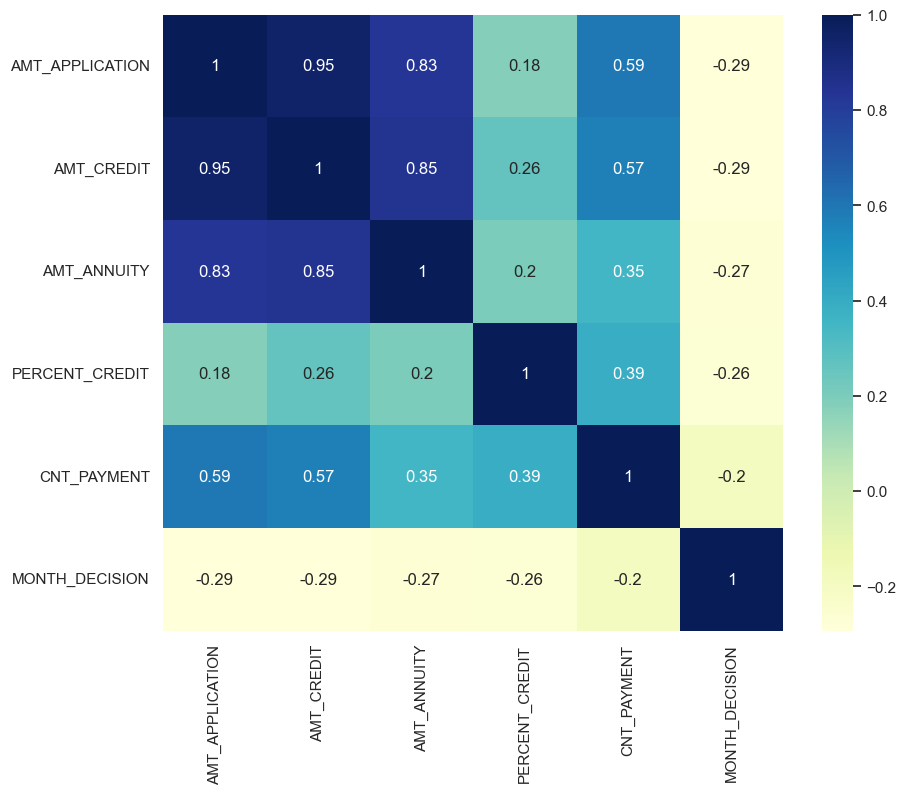

In [258]:
plt.figure(figsize=(10,8))
sns.heatmap(df_merged_corr.corr(),cmap="YlGnBu",annot=True)
plt.show()

**Highly corelate columns**
1. AMT_APPLICATION and AMT_CREDIT
2. AMT_APPLICATION and AMT_ANNUITY	
3. AMT_CREDIT and AMT_ANNUITY

**Moderately corelated columns**
1. AMT_APPLICATION and CNT_PAYMENT
2. AMT_CREDIT and CNT_PAYMENT

### Bivariate analysis on continious variable

#### Application amount and credited amount

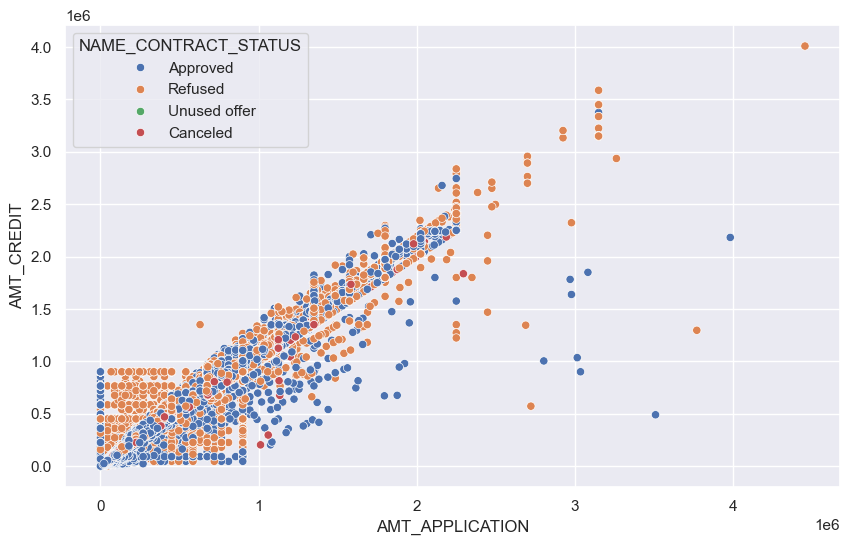

In [262]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='AMT_APPLICATION',y='AMT_CREDIT',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

##### Analysis
We can see that the applications are more concentrated on the lesser amount and so as the credited amount. Also, the credited amount is increased with respect to the application amount.

#### Application amount and the month taken to take decision related to current application

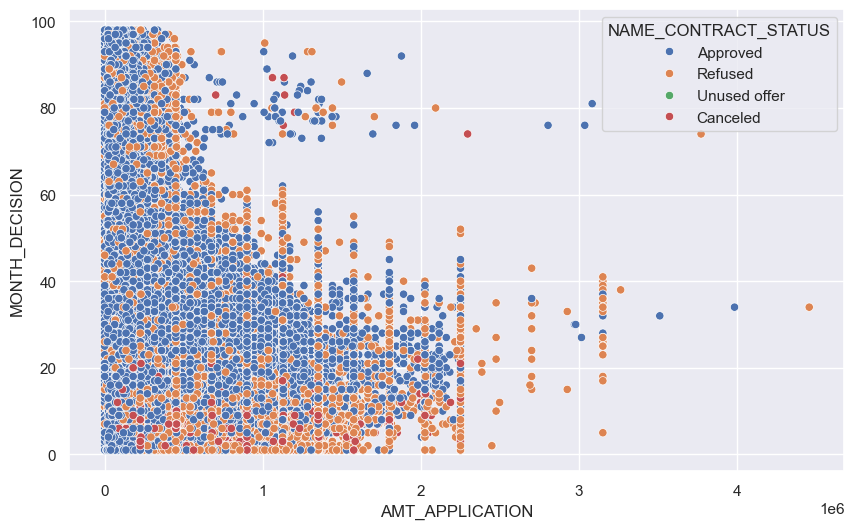

In [265]:
plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='AMT_APPLICATION',y='MONTH_DECISION',hue='NAME_CONTRACT_STATUS', data=df_merged)
plt.show()

##### Analysis
We can see a pattern here that the more the application amount of the loan, the lesser the months taken prior to current application. That means, most of the higher amount of the loan application decision made in the recent time comapred to the lower loan amount application. 

### Bivariate analysis on categorical variable

#### Credit amount of the loan of various categories

In [269]:
# Category list
categories = ['NAME_CONTRACT_TYPE','NAME_CLIENT_TYPE','NAME_PORTFOLIO','CHANNEL_TYPE']

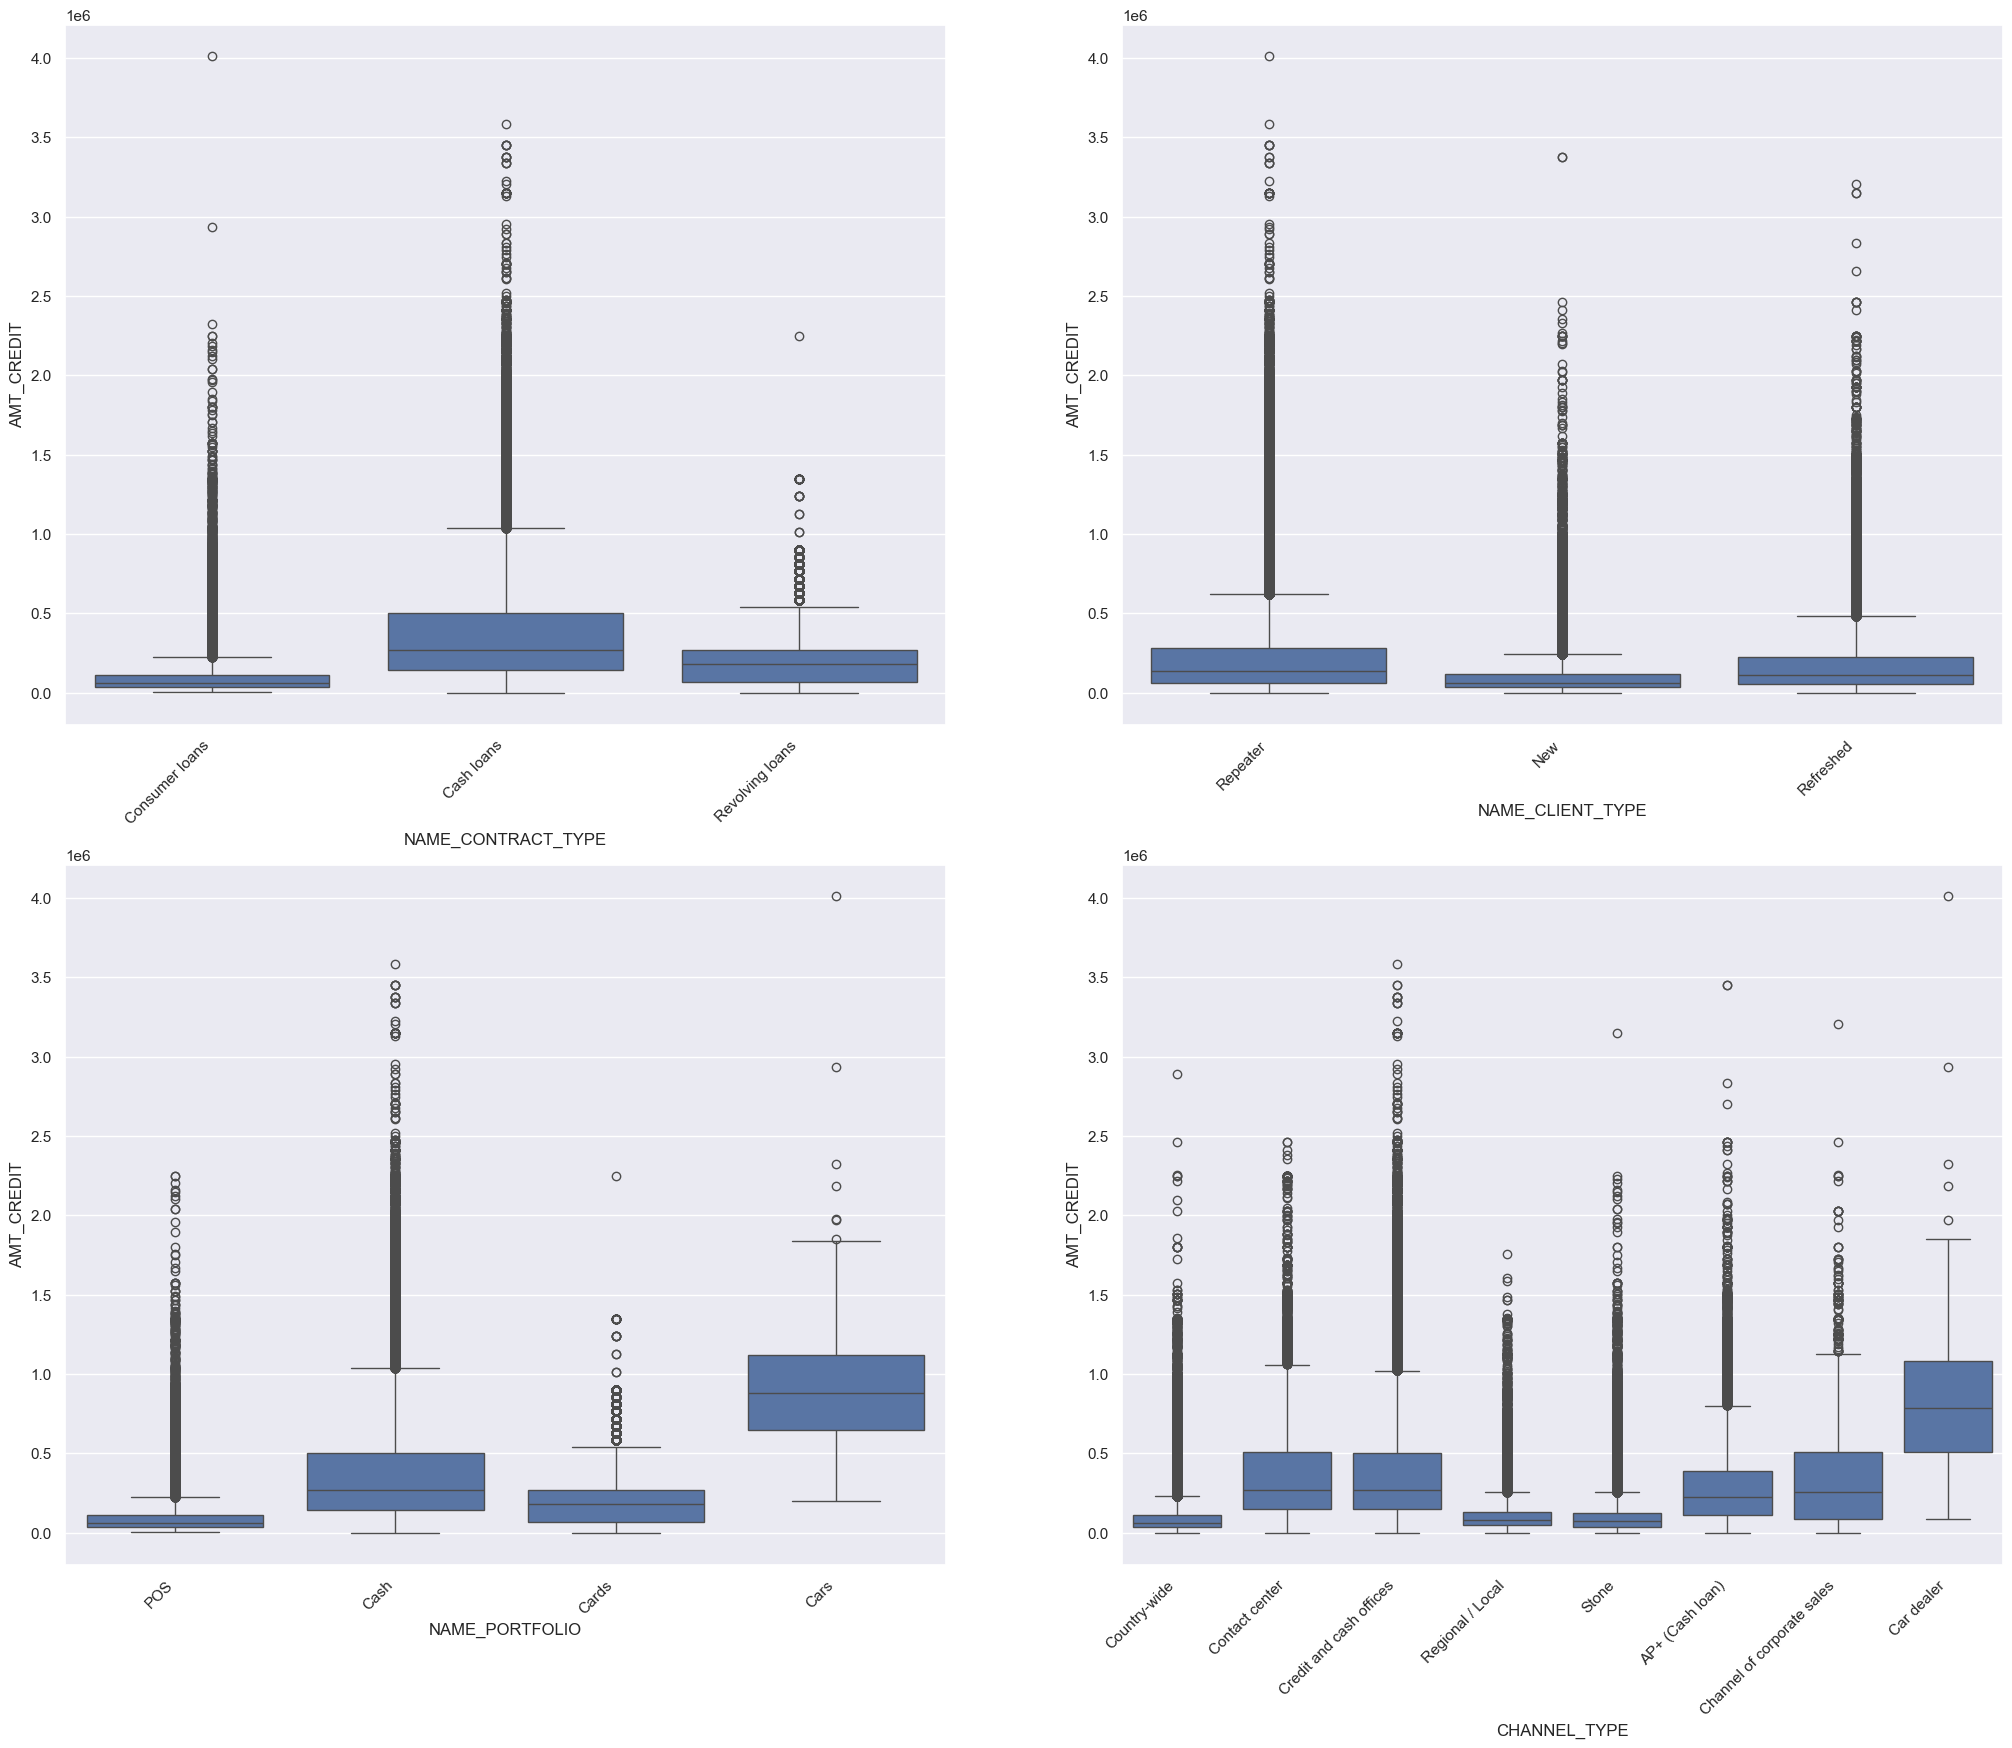

In [270]:
plt.figure(figsize=(25,20))
k=0
for category in categories:
    k = k+1
    ax = plt.subplot(2,2,k)
    sns.boxplot(x = category, y = 'AMT_CREDIT', data=df_merged)
    temp = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

##### Analysis
1. `Cash loans` are more credited in amount than Revolving and Consumer loans.
2. `Repeater` clients get more amount loan than new and refreshed clients.
3. The loan with portfolio `Cars` are more amount credited followed by `Cash`.
4. The credit amount of the loan is more from the application channel type as `car dealer` followed by `Channel of corporate sales`, `Credit and cash offices` and `Contact center`. The amount is very less for `Regional`, `Stone` and `Country-wide` channels.

#### Anslysis of two segmented variables

#### Status and Client type

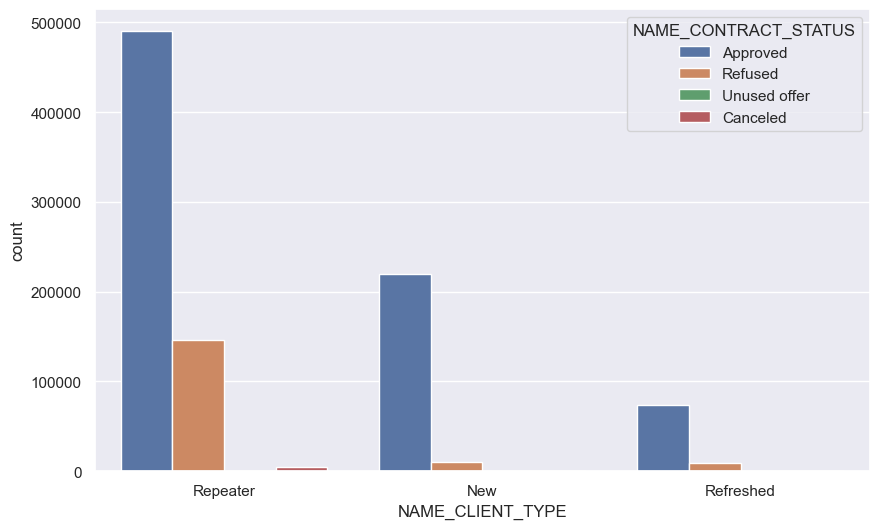

In [357]:
plt.figure(figsize=(10,6))

sns.countplot(x = 'NAME_CLIENT_TYPE' ,hue = 'NAME_CONTRACT_STATUS', data = df_merged )
plt.show()

##### Analysis

We see that the `Repeater` clients have more approved loans than `New` and `Refreshed` clients.

#### Current loan defaulter status with respect to previous loan application status

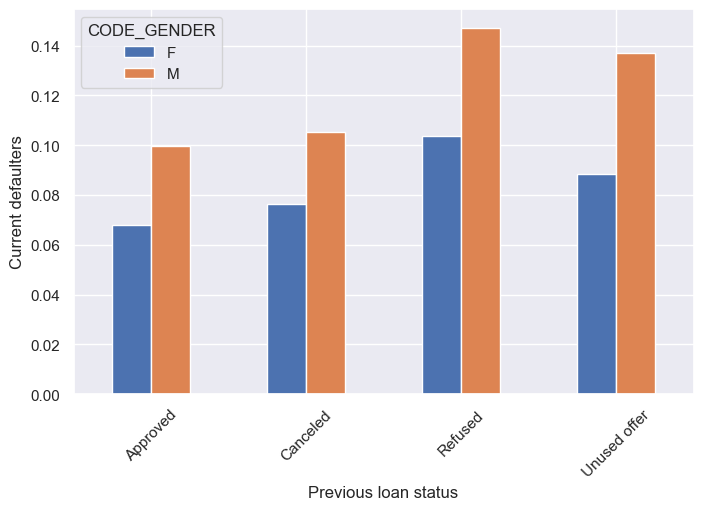

In [392]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

##### Analysis
We see that previously `Refused` client is more defaulted than previously `Approved` clients. Also, in all the cases the `Males` are more defaulted than `Females`.

#### Current loan defaulter status with respect to previous loan application status and client types

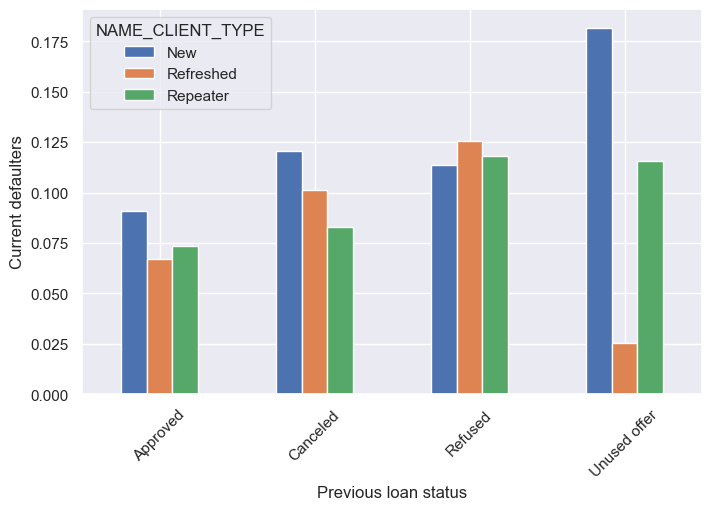

In [415]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_CLIENT_TYPE',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

##### Analysis
1. We can see that the `Defaulters` are more for previously `Unused offers` loan status clients, who were `New`.
2. For previously `Approved` status the `New` clients were more defaulted followed by `Repeater`.
3. For previously `Refused` applicants the `Defaulters` are more `Refreshed` clients.
4. For previously `Canceled` applicants the `Defaulters` are more `New` clients.

#### Current loan defaulter status with respect to previous loan application status and age group

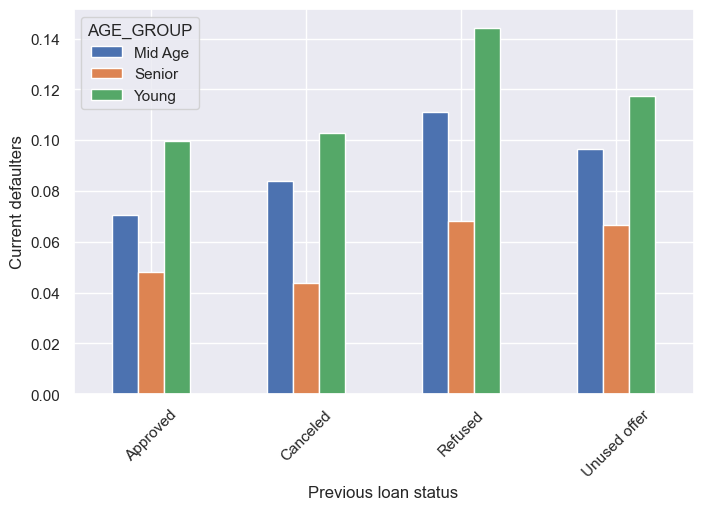

In [421]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='AGE_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

##### Analysis
1. For all the previous status `Young` applicants are more defaulted.
2. For all the previous status `Senior` applicants are less defaulted compared to others.

#### Current loan defaulter status with respect to previous loan application status and income group

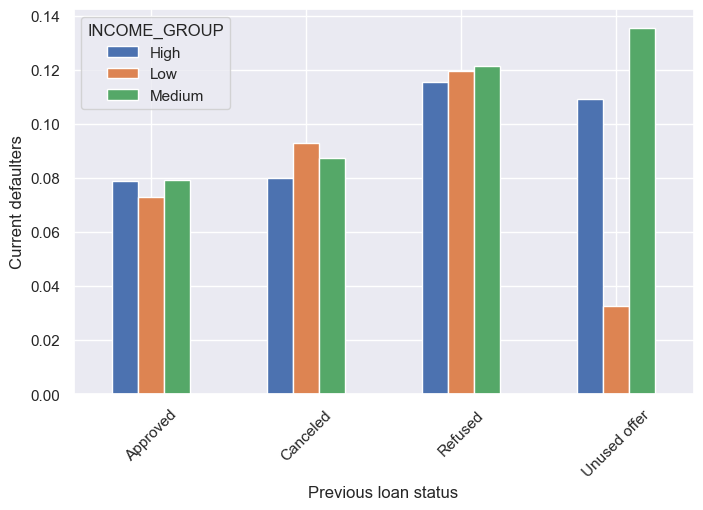

In [425]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='INCOME_GROUP',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

##### Analysis
1. For previously `Unused` offer the `Medium` income group was more defaulted and `Low` income group is the least.
2. For other application status more or less all the income groups are equally defaulted. 

#### Current loan defaulter status with respect to previous loan application status and portfolio of the loan

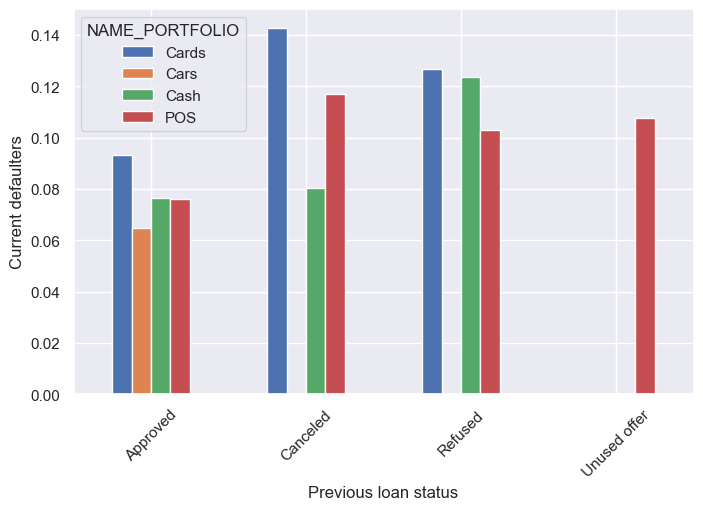

In [429]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='NAME_PORTFOLIO',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

##### Analysis
1. Most of the clients were defaulted, who previously applied loan for `Cards`.
2. For approved loan status the clients applied for `Cars` are less defaulted.
3. For `Refused` loan status the clients applied for `POS` are less defaulted.

#### Current loan defaulter status with respect to previous loan application status and external source score category

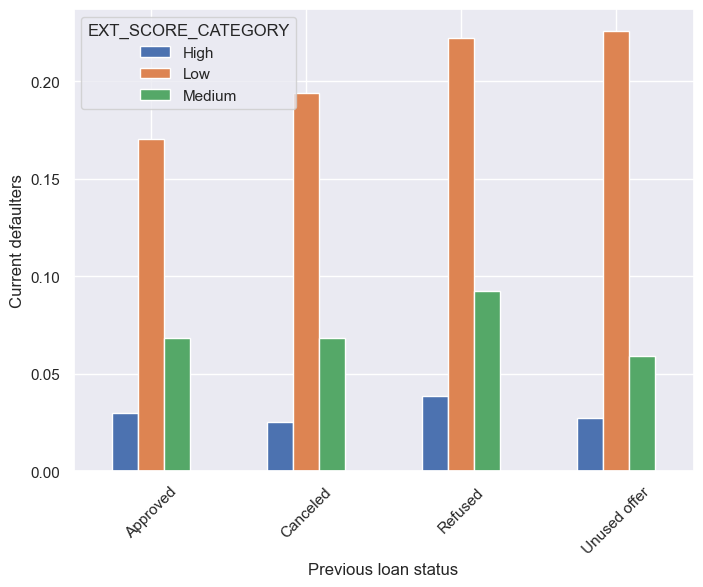

In [435]:
df_merged.pivot_table(values='TARGET',index='NAME_CONTRACT_STATUS',columns='EXT_SCORE_CATEGORY',aggfunc='mean').plot.bar(figsize=(8,6),rot=45)
plt.xlabel('Previous loan status')
plt.ylabel('Current defaulters')
plt.show()

##### Analysis
1. Applicants with low external source score are highly defaulted.
2. Higher scorer applicants are very ulikely to default irrespective of their previous loan status.

# THANK YOU